# Analysis on Google Trends and Weather Data

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pytrends.request import TrendReq
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.model_selection import train_test_split

## Extract and Read Data  ``~Google Trends

In [2]:
gtrend = pd.read_csv('//ictfilesrv/wta/Accu_Internal_D3_Projects/Pavani/ATT_GoogleData/Data/GoogleTrends/google.trends_All.csv')

In [3]:
gtrend

,Unnamed: 0,date,movies to watch,shows to binge watch,tv shows to watch,State,City
0,1,2016-01-01,29,0,0,CO,Denver
1,2,2016-01-02,31,0,12,CO,Denver
2,3,2016-01-03,42,0,12,CO,Denver
3,4,2016-01-04,26,0,21,CO,Denver
4,5,2016-01-05,37,0,11,CO,Denver
5,6,2016-01-06,32,0,21,CO,Denver
6,7,2016-01-07,16,0,0,CO,Denver
7,8,2016-01-08,31,0,11,CO,Denver
8,9,2016-01-09,37,0,0,CO,Denver
9,10,2016-01-10,23,0,23,CO,Denver


## Weather data

In [4]:
#import pypyodbc as podbc
import pyodbc


In [5]:
%load_ext sql

The sql module is not an IPython extension.


In [6]:
import urllib

params = 'DRIVER={SQL Server};' \
         'SERVER=ucc-archv-d3-sql.database.windows.net;' \
         'PORT=1433;' \
         'DATABASE=ucc-archv-d3;' \
         'UID=DataScienceUser;' \
         'PWD=D@t@Sc!U$er2018;'
            
params = urllib.parse.quote_plus(params)

In [7]:
from sqlalchemy import create_engine

db = create_engine('mssql+pyodbc:///?odbc_connect=%s' % params)

In [8]:
import pandas as pd

sql = '''
select * from [Aggregated].[StationData_Daily] as a inner join [Lookups].[Stations] as b 
ON a.StationID = b.StationID WHERE b.STATION_CODE in ('LGA','ORD','DAL','DEN','SEA') AND 

a.ObservationDate BETWEEN '2016-01-01' and (GETDATE()) order by a.ObservationDate ;
'''

weather = pd.read_sql_query(sql, db)

In [9]:
weather.shape

(6735, 138)

In [10]:
weather.head()

,StationID,ObservationDate,HEAT_INDEX_Minimum,HEAT_INDEX_Maximum,HEAT_INDEX_Average,DAY_NIGHT_Day_Count,DAY_NIGHT_Night_Count,WeatherCodeIDMode1,WeatherCodeIDMode2,WeatherCodeIDMode3,...,UFDB_DATABASE,GMT_OFFSET,DAYLIGHT_CODE,OBSERVATION_LATITUDE,OBSERVATION_LONGITUDE,RANDOM_VALUE,DATE_ADDED,CLIMO_RECORD_STATION,TIMEZONE_ID,SKI
0,44233,2016-01-01,66.193968,102.440310,88.290254,107,43,100,100.0,NaN,...,NA,-5.0,A,40.779,-73.880,255,2015-09-27 14:23:00,LGA,359,False
1,24793,2016-01-01,54.390581,137.045668,92.290120,100,38,100,97.0,NaN,...,NA,-6.0,A,32.854,-96.855,255,2015-09-27 14:57:00,None,369,False
2,57870,2016-01-01,205.286850,284.571156,246.056883,108,44,100,100.0,NaN,...,NA,-6.0,A,41.988,-87.932,255,2015-09-27 14:57:00,ORD,369,False
3,68589,2016-01-01,55.697715,205.286850,127.682059,96,37,93,NaN,NaN,...,NA,-8.0,A,47.445,-122.314,255,2015-09-27 14:40:00,SEA,379,False
4,24874,2016-01-01,56.783244,422.794395,281.043360,96,41,98,95.0,NaN,...,NA,-7.0,A,39.847,-104.656,255,2015-09-27 14:56:00,DEN,375,False


In [11]:
for col in weather.columns: 
    print(col) 

StationID
ObservationDate
HEAT_INDEX_Minimum
HEAT_INDEX_Maximum
HEAT_INDEX_Average
DAY_NIGHT_Day_Count
DAY_NIGHT_Night_Count
WeatherCodeIDMode1
WeatherCodeIDMode2
WeatherCodeIDMode3
CLOUD_COVER_Minimum
CLOUD_COVER_Maximum
CLOUD_COVER_Average
CEILING_Minimum
CEILING_Maximum
CEILING_Average
TEMPERATURE_Minimum
TEMPERATURE_Maximum
TEMPERATURE_Average
HEATING_DEGREE_DAYS_All_Hours
COOLING_DEGREE_DAYS_All_Hours
EFFECTIVE_DEGREE_DAYS_All_Hours
GROWING_DEGREE_DAYS_All_Hours
FREEZING_DEGREE_DAYS_Highest_Lowest
MAX_TEMPERATURE_NIGHT
MIN_TEMPERATURE_NIGHT
REAL_FEEL_TEMPERATURE_Minimum
REAL_FEEL_TEMPERATURE_Maximum
REAL_FEEL_TEMPERATURE_Average
REAL_FEEL_TEMPERATURE_SHADE_Minimum
REAL_FEEL_TEMPERATURE_SHADE_Maximum
REAL_FEEL_TEMPERATURE_SHADE_Average
APPARENT_TEMPERATURE_Minimum
APPARENT_TEMPERATURE_Maximum
APPARENT_TEMPERATURE_Average
WIND_CHILL_TEMPERATURE_Minimum
WIND_CHILL_TEMPERATURE_Maximum
WIND_CHILL_TEMPERATURE_Average
DEW_POINT_Minimum
DEW_POINT_Maximum
DEW_POINT_Average
RELATIVE_HUMIDIT

In [12]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6735 entries, 0 to 6734
Columns: 138 entries, StationID to SKI
dtypes: bool(5), datetime64[ns](1), float64(106), int64(12), object(14)
memory usage: 6.9+ MB


In [13]:
weather_data = weather[['ObservationDate','HEAT_INDEX_Minimum','HEAT_INDEX_Maximum','HEAT_INDEX_Average','CLOUD_COVER_Minimum','CLOUD_COVER_Maximum',
'CLOUD_COVER_Average','TEMPERATURE_Minimum',
'TEMPERATURE_Maximum','TEMPERATURE_Average','REAL_FEEL_TEMPERATURE_Minimum',
'REAL_FEEL_TEMPERATURE_Maximum','REAL_FEEL_TEMPERATURE_Average','RELATIVE_HUMIDITY_Minimum',
'RELATIVE_HUMIDITY_Maximum','RELATIVE_HUMIDITY_Average','WIND_SPEED_Minimum','WIND_SPEED_Maximum','WIND_SPEED_Average',                       
                       'PRECIPITATION_Minimum','PRECIPITATION_Maximum','PRECIPITATION_Average','STATION_CODE','STATE','COUNTRY']].copy()

In [14]:
print(weather_data.head())
print(weather_data.tail())

  ObservationDate  HEAT_INDEX_Minimum  HEAT_INDEX_Maximum  HEAT_INDEX_Average  \
0      2016-01-01           66.193968          102.440310           88.290254   
1      2016-01-01           54.390581          137.045668           92.290120   
2      2016-01-01          205.286850          284.571156          246.056883   
3      2016-01-01           55.697715          205.286850          127.682059   
4      2016-01-01           56.783244          422.794395          281.043360   

   CLOUD_COVER_Minimum  CLOUD_COVER_Maximum  CLOUD_COVER_Average  \
0                 40.0                100.0            91.440972   
1                 60.0                100.0            88.323413   
2                 35.0                100.0            75.775463   
3                  0.0                 35.0             2.770833   
4                  0.0                 35.0            14.598710   

   TEMPERATURE_Minimum  TEMPERATURE_Maximum  TEMPERATURE_Average   ...     \
0                 39.0     

In [15]:
weather_data.tail()

,ObservationDate,HEAT_INDEX_Minimum,HEAT_INDEX_Maximum,HEAT_INDEX_Average,CLOUD_COVER_Minimum,CLOUD_COVER_Maximum,CLOUD_COVER_Average,TEMPERATURE_Minimum,TEMPERATURE_Maximum,TEMPERATURE_Average,...,RELATIVE_HUMIDITY_Average,WIND_SPEED_Minimum,WIND_SPEED_Maximum,WIND_SPEED_Average,PRECIPITATION_Minimum,PRECIPITATION_Maximum,PRECIPITATION_Average,STATION_CODE,STATE,COUNTRY
6730,2019-09-08,-145.261213,-52.768410,-101.897699,0.0,40.0,11.045139,79.00,100.0,89.834861,...,39.659722,3.453,17.265,9.260388,0.0,0.00,0.000000,DAL,TX,US
6731,2019-09-08,-76.452852,47.482165,-25.776906,0.0,100.0,41.993056,51.00,86.0,66.385833,...,54.694444,4.604,37.983,9.498151,0.0,0.00,0.000000,DEN,CO,US
6732,2019-09-08,-81.588747,-53.536038,-62.093086,5.0,100.0,59.770833,67.00,79.0,71.915556,...,52.013889,3.453,13.812,7.811048,0.0,0.00,0.000000,LGA,NY,US
6733,2019-09-08,-76.542360,-31.746428,-51.500584,76.0,100.0,97.444444,62.00,70.0,65.113819,...,70.665278,4.604,13.812,9.151725,0.0,0.03,0.004671,ORD,IL,US
6734,2019-09-08,-74.206410,-14.100431,-41.155980,90.0,100.0,99.187500,58.29,73.0,62.936181,...,80.284722,5.755,16.114,8.282716,0.0,0.59,0.048684,SEA,WA,US


#### Merge on ObservationDate , City ~ Weather_Data and gtrend

In [16]:
gtrend['STATION_CODE'] = np.where(gtrend['City']=='Denver', 'DEN', np.where(gtrend['City']=='Dallas', 'DAL', np.where(gtrend['City']=='Seattle', 'SEA',np.where(gtrend['City']=='New York', 'LGA',np.where(gtrend['City']=='Chicago', 'ORD','NA')))))

In [17]:

gtrend.groupby('STATION_CODE').count()



,Unnamed: 0,date,movies to watch,shows to binge watch,tv shows to watch,State,City
STATION_CODE,,,,,,,
DAL,1152,1152,1152,1152,1152,1152,1152
DEN,1152,1152,1152,1152,1152,1152,1152
LGA,1152,1152,1152,1152,1152,1152,1152
ORD,1152,1152,1152,1152,1152,1152,1152
SEA,1152,1152,1152,1152,1152,1152,1152


In [18]:
weather_data = weather_data.rename(columns={'ObservationDate': 'date', 'STATE': 'State'})

In [19]:
Trends_Weather=pd.merge(gtrend,weather_data, on=['date', 'STATION_CODE','State'])

In [20]:
Trends_Weather.groupby('STATION_CODE').count()

,Unnamed: 0,date,movies to watch,shows to binge watch,tv shows to watch,State,City,HEAT_INDEX_Minimum,HEAT_INDEX_Maximum,HEAT_INDEX_Average,...,RELATIVE_HUMIDITY_Minimum,RELATIVE_HUMIDITY_Maximum,RELATIVE_HUMIDITY_Average,WIND_SPEED_Minimum,WIND_SPEED_Maximum,WIND_SPEED_Average,PRECIPITATION_Minimum,PRECIPITATION_Maximum,PRECIPITATION_Average,COUNTRY
STATION_CODE,,,,,,,,,,,,,,,,,,,,,
DAL,1152,1152,1152,1152,1152,1152,1152,1152,1152,1152,...,1152,1152,1152,1152,1152,1152,1152,1152,1152,1152
DEN,1152,1152,1152,1152,1152,1152,1152,1152,1152,1152,...,1152,1152,1152,1152,1152,1152,1152,1152,1152,1152
LGA,1152,1152,1152,1152,1152,1152,1152,1152,1152,1152,...,1152,1152,1152,1152,1152,1152,1152,1152,1152,1152
ORD,1152,1152,1152,1152,1152,1152,1152,1152,1152,1152,...,1152,1152,1152,1152,1152,1152,1152,1152,1152,1152
SEA,1152,1152,1152,1152,1152,1152,1152,1152,1152,1152,...,1152,1152,1152,1152,1152,1152,1152,1152,1152,1152


In [21]:
Trends_Weather.columns

Index(['Unnamed: 0', 'date', 'movies to watch', 'shows to binge watch',
       'tv shows to watch', 'State', 'City', 'STATION_CODE',
       'HEAT_INDEX_Minimum', 'HEAT_INDEX_Maximum', 'HEAT_INDEX_Average',
       'CLOUD_COVER_Minimum', 'CLOUD_COVER_Maximum', 'CLOUD_COVER_Average',
       'TEMPERATURE_Minimum', 'TEMPERATURE_Maximum', 'TEMPERATURE_Average',
       'REAL_FEEL_TEMPERATURE_Minimum', 'REAL_FEEL_TEMPERATURE_Maximum',
       'REAL_FEEL_TEMPERATURE_Average', 'RELATIVE_HUMIDITY_Minimum',
       'RELATIVE_HUMIDITY_Maximum', 'RELATIVE_HUMIDITY_Average',
       'WIND_SPEED_Minimum', 'WIND_SPEED_Maximum', 'WIND_SPEED_Average',
       'PRECIPITATION_Minimum', 'PRECIPITATION_Maximum',
       'PRECIPITATION_Average', 'COUNTRY'],
      dtype='object')

In [22]:
Trends_Weather.nunique()


Unnamed: 0                       5760
date                             1152
movies to watch                    98
shows to binge watch               26
tv shows to watch                  40
State                               5
City                                5
STATION_CODE                        5
HEAT_INDEX_Minimum               2872
HEAT_INDEX_Maximum               2663
HEAT_INDEX_Average               5760
CLOUD_COVER_Minimum               109
CLOUD_COVER_Maximum                68
CLOUD_COVER_Average              5331
TEMPERATURE_Minimum               935
TEMPERATURE_Maximum               288
TEMPERATURE_Average              5395
REAL_FEEL_TEMPERATURE_Minimum    3312
REAL_FEEL_TEMPERATURE_Maximum    3931
REAL_FEEL_TEMPERATURE_Average    5756
RELATIVE_HUMIDITY_Minimum          89
RELATIVE_HUMIDITY_Maximum          76
RELATIVE_HUMIDITY_Average        5214
WIND_SPEED_Minimum                109
WIND_SPEED_Maximum                 53
WIND_SPEED_Average               4920
PRECIPITATIO

In [23]:
Trends_Weather['date']=pd.to_datetime(Trends_Weather['date'])

In [24]:
Trends_Weather['month'] = pd.DatetimeIndex(Trends_Weather['date']).month
Trends_Weather['month_year'] = pd.to_datetime(Trends_Weather['date']).dt.to_period('M')
Trends_Weather['year'] = pd.DatetimeIndex(Trends_Weather['date']).year

In [25]:
import calendar
Trends_Weather['month']= Trends_Weather['month'].apply(lambda x: calendar.month_abbr[x])

In [26]:
Trends_Weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5760 entries, 0 to 5759
Data columns (total 33 columns):
Unnamed: 0                       5760 non-null int64
date                             5760 non-null datetime64[ns]
movies to watch                  5760 non-null int64
shows to binge watch             5760 non-null int64
tv shows to watch                5760 non-null int64
State                            5760 non-null object
City                             5760 non-null object
STATION_CODE                     5760 non-null object
HEAT_INDEX_Minimum               5760 non-null float64
HEAT_INDEX_Maximum               5760 non-null float64
HEAT_INDEX_Average               5760 non-null float64
CLOUD_COVER_Minimum              5760 non-null float64
CLOUD_COVER_Maximum              5760 non-null float64
CLOUD_COVER_Average              5760 non-null float64
TEMPERATURE_Minimum              5760 non-null float64
TEMPERATURE_Maximum              5760 non-null float64
TEMPERATURE_Avera

In [27]:
Trends_Weather.head()

,Unnamed: 0,date,movies to watch,shows to binge watch,tv shows to watch,State,City,STATION_CODE,HEAT_INDEX_Minimum,HEAT_INDEX_Maximum,...,WIND_SPEED_Minimum,WIND_SPEED_Maximum,WIND_SPEED_Average,PRECIPITATION_Minimum,PRECIPITATION_Maximum,PRECIPITATION_Average,COUNTRY,month,month_year,year
0,1,2016-01-01,29,0,0,CO,Denver,DEN,56.783244,422.794395,...,0.000,13.812,8.764385,0.0,0.00001,6.900000e-07,US,Jan,2016-01,2016
1,2,2016-01-02,31,0,12,CO,Denver,DEN,57.253740,189.185918,...,3.453,16.114,10.119208,0.0,0.00000,0.000000e+00,US,Jan,2016-01,2016
2,3,2016-01-03,42,0,12,CO,Denver,DEN,56.116524,214.043475,...,0.000,13.812,7.301656,0.0,0.00000,0.000000e+00,US,Jan,2016-01,2016
3,4,2016-01-04,26,0,21,CO,Denver,DEN,65.550594,260.265390,...,3.453,10.359,7.145792,0.0,0.00000,0.000000e+00,US,Jan,2016-01,2016
4,5,2016-01-05,37,0,11,CO,Denver,DEN,57.084802,199.743870,...,0.000,9.208,5.930847,0.0,0.00000,0.000000e+00,US,Jan,2016-01,2016


## Checking Values of Temperature and Labeling them

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

(array([   7.,   90.,  495., 1569., 1617., 1549.,  433.]),
 array([-15.03183333,   0.98461905,  17.00107143,  33.01752381,
         49.03397619,  65.05042857,  81.06688095,  97.08333333]),
 <a list of 7 Patch objects>)

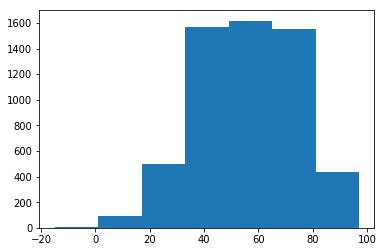

In [29]:
plt.hist(Trends_Weather['TEMPERATURE_Average'], bins=7)

In [30]:
Trends_Weather['TEMPERATURE_Average']

conditions = [
    (Trends_Weather['TEMPERATURE_Average']<20) ,
    (Trends_Weather['TEMPERATURE_Average'] >= 20) & (Trends_Weather['TEMPERATURE_Average'] < 32),
    (Trends_Weather['TEMPERATURE_Average'] >= 32) & (Trends_Weather['TEMPERATURE_Average'] < 45),
    (Trends_Weather['TEMPERATURE_Average'] >= 45) & (Trends_Weather['TEMPERATURE_Average'] < 60),
    (Trends_Weather['TEMPERATURE_Average'] >= 60) & (Trends_Weather['TEMPERATURE_Average'] < 75),
    (Trends_Weather['TEMPERATURE_Average'] >= 75) & (Trends_Weather['TEMPERATURE_Average'] < 85),
     (Trends_Weather['TEMPERATURE_Average'] >= 85) & (Trends_Weather['TEMPERATURE_Average'] < 105),
    (Trends_Weather['TEMPERATURE_Average'] >= 105)
]
choices = ['Very Cold', 'Cold', 'Very Cool','Cool','Warm','Very Warm','Hot','Very Hot']
Trends_Weather['TEMP_Average_Label']= np.select(conditions, choices, default='black')


In [31]:
Trends_Weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5760 entries, 0 to 5759
Data columns (total 34 columns):
Unnamed: 0                       5760 non-null int64
date                             5760 non-null datetime64[ns]
movies to watch                  5760 non-null int64
shows to binge watch             5760 non-null int64
tv shows to watch                5760 non-null int64
State                            5760 non-null object
City                             5760 non-null object
STATION_CODE                     5760 non-null object
HEAT_INDEX_Minimum               5760 non-null float64
HEAT_INDEX_Maximum               5760 non-null float64
HEAT_INDEX_Average               5760 non-null float64
CLOUD_COVER_Minimum              5760 non-null float64
CLOUD_COVER_Maximum              5760 non-null float64
CLOUD_COVER_Average              5760 non-null float64
TEMPERATURE_Minimum              5760 non-null float64
TEMPERATURE_Maximum              5760 non-null float64
TEMPERATURE_Avera

### Displaying top 17 rows of Temperature Avg and Label

In [32]:
Trends_Weather.loc[1:17,['TEMPERATURE_Average', 'TEMP_Average_Label']]

,TEMPERATURE_Average,TEMP_Average_Label
1,24.875000,Cold
2,28.541667,Cold
3,29.041667,Cold
4,32.500000,Very Cool
5,33.375000,Very Cool
6,30.699297,Cold
7,25.949895,Cold
8,21.006443,Cold
9,15.136667,Very Cold
10,22.583333,Cold


(array([   2.,   32.,   76.,  304.,  851., 1262., 1084., 1139.,  810.,
         200.]), array([-15.03183333,  -3.82031666,   7.3912    ,  18.60271667,
         29.81423333,  41.02575   ,  52.23726667,  63.44878333,
         74.6603    ,  85.87181666,  97.08333333]), <a list of 10 Patch objects>)

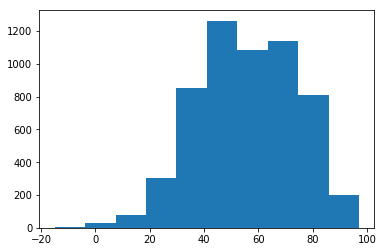

In [33]:
plt.hist(Trends_Weather['TEMPERATURE_Average'], bins=10)

# Labeling Seasons

In [34]:
conditions =[
    (Trends_Weather['month']=="Jan" )| (Trends_Weather['month']=="Dec")| (Trends_Weather['month']=="Feb"),
    (Trends_Weather['month']=="Mar") | (Trends_Weather['month']=="Apr") | ( Trends_Weather['month']=="May"),
    (Trends_Weather['month']=="Jun") | (Trends_Weather['month']=="Jul") | (Trends_Weather['month']=="Aug"),
    (Trends_Weather['month']=="Sep")|(Trends_Weather['month']=="Oct")| (Trends_Weather['month']=="Nov"),
   ]
choices = ['Winter', 'Spring', 'Summer','Fall']
Trends_Weather['Season']= np.select(conditions, choices, default="black")



In [35]:
Trends_Weather['Season'].value_counts()

Winter    1635
Spring    1380
Summer    1380
Fall      1365
Name: Season, dtype: int64

# Labeling Precep MAX

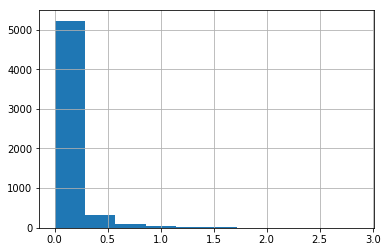

In [36]:
Trends_Weather['PRECIPITATION_Maximum'].hist()

In [37]:
Trends_Weather['PRECIPITATION_Maximum']

conditions = [
    (Trends_Weather['PRECIPITATION_Maximum']<0.10) ,
    (Trends_Weather['PRECIPITATION_Maximum'] >= 0.10) & (Trends_Weather['PRECIPITATION_Maximum'] <= 0.30),
    (Trends_Weather['PRECIPITATION_Maximum'] > 0.3),]
choices = ['Light Rain', 'Moderate Rain', 'Heavy Rain']
Trends_Weather['Precep_Label']= np.select(conditions, choices, default='black')

In [38]:
Trends_Weather['Precep_Label'].value_counts()

Light Rain       4618
Moderate Rain     631
Heavy Rain        511
Name: Precep_Label, dtype: int64

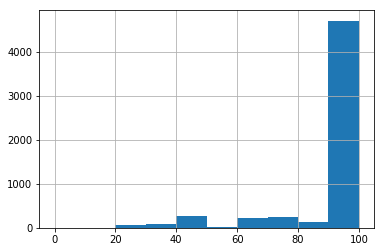

In [39]:
Trends_Weather['CLOUD_COVER_Maximum'].hist()

In [40]:
X = Trends_Weather[['CLOUD_COVER_Minimum','CLOUD_COVER_Maximum',
'CLOUD_COVER_Average','TEMPERATURE_Minimum',
'TEMPERATURE_Maximum','TEMPERATURE_Average','REAL_FEEL_TEMPERATURE_Minimum',
'REAL_FEEL_TEMPERATURE_Maximum','REAL_FEEL_TEMPERATURE_Average','RELATIVE_HUMIDITY_Minimum',
'RELATIVE_HUMIDITY_Maximum','RELATIVE_HUMIDITY_Average','WIND_SPEED_Minimum','WIND_SPEED_Maximum','WIND_SPEED_Average',                       
                       'PRECIPITATION_Minimum','PRECIPITATION_Maximum','PRECIPITATION_Average']].copy()

[0.04803804 0.02830814 0.0681303  0.06358741 0.06394735 0.06506877
 0.06661059 0.06742953 0.0651923  0.06658399 0.06444989 0.06825493
 0.04303868 0.06417381 0.06761793 0.00115274 0.04409856 0.04431703]


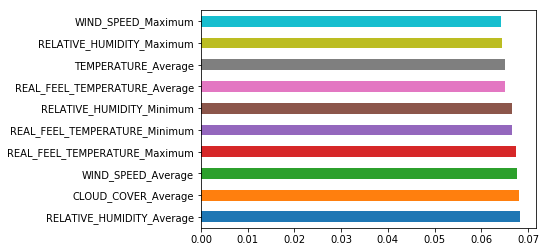

In [41]:
from sklearn.ensemble import ExtraTreesClassifier

y = Trends_Weather['movies to watch']

model = ExtraTreesClassifier(n_estimators=1000)
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')

## Feature Importance

From the above plot we can interpret that 

1. Relative_HUMIDITY_Average
2. WIND_SPEED_Average
3. REAL_FEEL_TEMPERATURE_Maximum
4. TEMPERATURE_Average

The labels for temperatures are created on TEMPERATURE_Average and REAL_FEEL_TEMPERATURE_Average 
are to be taken into consideration



[0.05012206 0.02889557 0.06502328 0.06468646 0.06296528 0.06361322
 0.06599138 0.06512297 0.06471217 0.06658483 0.0634616  0.06584964
 0.04671398 0.06293394 0.06753874 0.00186727 0.04730315 0.04661446]


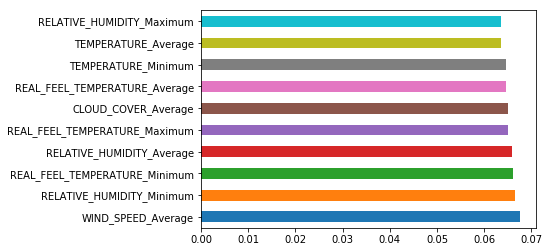

In [42]:
y = Trends_Weather['shows to binge watch']

model = ExtraTreesClassifier(n_estimators=1000)
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')

From this plot we can say that WIN_SPEED_Average, RELATIVE_HUMIDITY_Minimum,REAL_FEEL_TEMPERATURE_Minimum to be taken to consideration while evaluating shows to binge watch

[0.04872252 0.02971623 0.06534105 0.06563669 0.06396424 0.06343435
 0.0667849  0.06535239 0.0633382  0.07082695 0.06434359 0.06835007
 0.04492877 0.0623918  0.06715112 0.00106198 0.04423987 0.04441529]


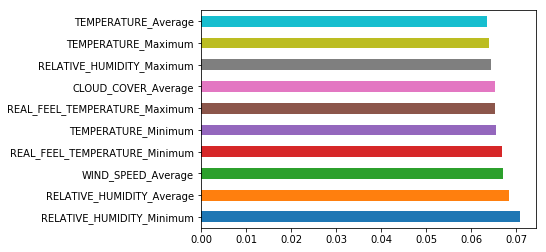

In [43]:
y = Trends_Weather['tv shows to watch']

model = ExtraTreesClassifier(n_estimators=1000)
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')

# Labeling RealFeel Avg

In [44]:
Trends_Weather['REAL_FEEL_TEMPERATURE_Average']

conditions = [
    (Trends_Weather['REAL_FEEL_TEMPERATURE_Average']<20) ,
    (Trends_Weather['REAL_FEEL_TEMPERATURE_Average'] >= 20) & (Trends_Weather['REAL_FEEL_TEMPERATURE_Average'] < 32),
    (Trends_Weather['REAL_FEEL_TEMPERATURE_Average'] >= 32) & (Trends_Weather['REAL_FEEL_TEMPERATURE_Average'] < 45),
    (Trends_Weather['REAL_FEEL_TEMPERATURE_Average'] >= 45) & (Trends_Weather['REAL_FEEL_TEMPERATURE_Average'] < 60),
    (Trends_Weather['REAL_FEEL_TEMPERATURE_Average'] >= 60) & (Trends_Weather['REAL_FEEL_TEMPERATURE_Average'] < 75),
    (Trends_Weather['REAL_FEEL_TEMPERATURE_Average'] >= 75) & (Trends_Weather['REAL_FEEL_TEMPERATURE_Average'] < 85),
     (Trends_Weather['REAL_FEEL_TEMPERATURE_Average'] >= 85) & (Trends_Weather['REAL_FEEL_TEMPERATURE_Average'] < 105),
    (Trends_Weather['REAL_FEEL_TEMPERATURE_Average'] >= 105)
]
choices = ['Very Cold', 'Cold', 'Very Cool','Cool','Warm','Very Warm','Hot','Very Hot']
Trends_Weather['REAL_FEEL_TEMP_Average_Label']= np.select(conditions, choices, default='black')

In [45]:
Trends_Weather.head(5)

,Unnamed: 0,date,movies to watch,shows to binge watch,tv shows to watch,State,City,STATION_CODE,HEAT_INDEX_Minimum,HEAT_INDEX_Maximum,...,PRECIPITATION_Maximum,PRECIPITATION_Average,COUNTRY,month,month_year,year,TEMP_Average_Label,Season,Precep_Label,REAL_FEEL_TEMP_Average_Label
0,1,2016-01-01,29,0,0,CO,Denver,DEN,56.783244,422.794395,...,0.00001,6.900000e-07,US,Jan,2016-01,2016,Very Cold,Winter,Light Rain,Very Cold
1,2,2016-01-02,31,0,12,CO,Denver,DEN,57.253740,189.185918,...,0.00000,0.000000e+00,US,Jan,2016-01,2016,Cold,Winter,Light Rain,Very Cold
2,3,2016-01-03,42,0,12,CO,Denver,DEN,56.116524,214.043475,...,0.00000,0.000000e+00,US,Jan,2016-01,2016,Cold,Winter,Light Rain,Cold
3,4,2016-01-04,26,0,21,CO,Denver,DEN,65.550594,260.265390,...,0.00000,0.000000e+00,US,Jan,2016-01,2016,Cold,Winter,Light Rain,Cold
4,5,2016-01-05,37,0,11,CO,Denver,DEN,57.084802,199.743870,...,0.00000,0.000000e+00,US,Jan,2016-01,2016,Very Cool,Winter,Light Rain,Cold


# Labeling WindSpeed Avg

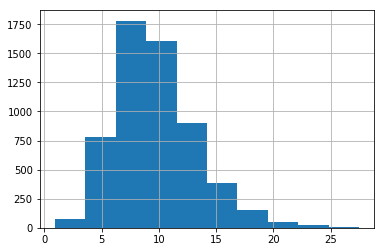

In [46]:
Trends_Weather['WIND_SPEED_Average'].hist()

In [47]:
Trends_Weather['WIND_SPEED_Average']

conditions = [
    (Trends_Weather['WIND_SPEED_Average']<8) ,
    (Trends_Weather['WIND_SPEED_Average'] >=8) & (Trends_Weather['WIND_SPEED_Average'] <=15),
    (Trends_Weather['WIND_SPEED_Average'] > 15),]
choices = ['Low Wind', 'Moderate Wind', 'High Wind']
Trends_Weather['Wind_Label']= np.select(conditions, choices, default='black')

In [48]:
Trends_Weather.head(5)

,Unnamed: 0,date,movies to watch,shows to binge watch,tv shows to watch,State,City,STATION_CODE,HEAT_INDEX_Minimum,HEAT_INDEX_Maximum,...,PRECIPITATION_Average,COUNTRY,month,month_year,year,TEMP_Average_Label,Season,Precep_Label,REAL_FEEL_TEMP_Average_Label,Wind_Label
0,1,2016-01-01,29,0,0,CO,Denver,DEN,56.783244,422.794395,...,6.900000e-07,US,Jan,2016-01,2016,Very Cold,Winter,Light Rain,Very Cold,Moderate Wind
1,2,2016-01-02,31,0,12,CO,Denver,DEN,57.253740,189.185918,...,0.000000e+00,US,Jan,2016-01,2016,Cold,Winter,Light Rain,Very Cold,Moderate Wind
2,3,2016-01-03,42,0,12,CO,Denver,DEN,56.116524,214.043475,...,0.000000e+00,US,Jan,2016-01,2016,Cold,Winter,Light Rain,Cold,Low Wind
3,4,2016-01-04,26,0,21,CO,Denver,DEN,65.550594,260.265390,...,0.000000e+00,US,Jan,2016-01,2016,Cold,Winter,Light Rain,Cold,Low Wind
4,5,2016-01-05,37,0,11,CO,Denver,DEN,57.084802,199.743870,...,0.000000e+00,US,Jan,2016-01,2016,Very Cool,Winter,Light Rain,Cold,Low Wind


# Labeling Humidity Avg

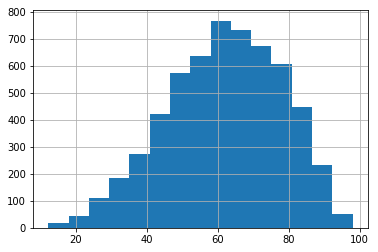

In [49]:
Trends_Weather['RELATIVE_HUMIDITY_Average'].hist(bins=15)

In [50]:
Trends_Weather['RELATIVE_HUMIDITY_Average']

conditions = [
    (Trends_Weather['RELATIVE_HUMIDITY_Average']<40) ,
    (Trends_Weather['RELATIVE_HUMIDITY_Average'] >=40) & (Trends_Weather['RELATIVE_HUMIDITY_Average'] <=70),
    (Trends_Weather['RELATIVE_HUMIDITY_Average'] > 70),]
choices = ['Low Humidity', 'Moderate Humidity', 'High Humidity']
Trends_Weather['Humid_Label']= np.select(conditions, choices, default='black')

In [51]:
Trends_Weather['Humid_Label'].value_counts()

Moderate Humidity    3259
High Humidity        1924
Low Humidity          577
Name: Humid_Label, dtype: int64

In [52]:
label_encoder = LabelEncoder()

In [53]:
Trends_Weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5760 entries, 0 to 5759
Data columns (total 39 columns):
Unnamed: 0                       5760 non-null int64
date                             5760 non-null datetime64[ns]
movies to watch                  5760 non-null int64
shows to binge watch             5760 non-null int64
tv shows to watch                5760 non-null int64
State                            5760 non-null object
City                             5760 non-null object
STATION_CODE                     5760 non-null object
HEAT_INDEX_Minimum               5760 non-null float64
HEAT_INDEX_Maximum               5760 non-null float64
HEAT_INDEX_Average               5760 non-null float64
CLOUD_COVER_Minimum              5760 non-null float64
CLOUD_COVER_Maximum              5760 non-null float64
CLOUD_COVER_Average              5760 non-null float64
TEMPERATURE_Minimum              5760 non-null float64
TEMPERATURE_Maximum              5760 non-null float64
TEMPERATURE_Avera

### Label Encoding the Labeled Data

In [54]:
Trends_Weather['TEMP_Avg']=label_encoder.fit_transform(Trends_Weather['TEMP_Average_Label'])
Trends_Weather['REALFeel_Avg']=label_encoder.fit_transform(Trends_Weather['REAL_FEEL_TEMP_Average_Label'])
Trends_Weather['Precep']=label_encoder.fit_transform(Trends_Weather['Precep_Label'])
Trends_Weather['Wind']=label_encoder.fit_transform(Trends_Weather['Wind_Label'])
Trends_Weather['Humid']=label_encoder.fit_transform(Trends_Weather['Humid_Label'])
Trends_Weather['Season_l']=label_encoder.fit_transform(Trends_Weather['Season'])
Trends_Weather['City_l']=label_encoder.fit_transform(Trends_Weather['City'])

In [55]:
Trends_Weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5760 entries, 0 to 5759
Data columns (total 46 columns):
Unnamed: 0                       5760 non-null int64
date                             5760 non-null datetime64[ns]
movies to watch                  5760 non-null int64
shows to binge watch             5760 non-null int64
tv shows to watch                5760 non-null int64
State                            5760 non-null object
City                             5760 non-null object
STATION_CODE                     5760 non-null object
HEAT_INDEX_Minimum               5760 non-null float64
HEAT_INDEX_Maximum               5760 non-null float64
HEAT_INDEX_Average               5760 non-null float64
CLOUD_COVER_Minimum              5760 non-null float64
CLOUD_COVER_Maximum              5760 non-null float64
CLOUD_COVER_Average              5760 non-null float64
TEMPERATURE_Minimum              5760 non-null float64
TEMPERATURE_Maximum              5760 non-null float64
TEMPERATURE_Avera

### Univariate Selection { Checking the Scores for each target variable of Each Transformed Labeled Feature }

In [56]:
X = Trends_Weather.select_dtypes(['int32'])
#X = X.drop(columns=['State','Season','City','STATION_CODE','COUNTRY','month','month_year'])
y = Trends_Weather['movies to watch']

# apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  # naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 5 best features

          Specs       Score
6        City_l  192.109812
0      TEMP_Avg  172.138231
5      Season_l  142.090637
1  REALFeel_Avg  139.266693
4         Humid   71.434431
3          Wind   27.102701
2        Precep   26.049271


In [57]:
X = Trends_Weather.select_dtypes(['int32'])
#X = X.drop(columns=['State','Season','City','STATION_CODE','COUNTRY','month','month_year'])
y = Trends_Weather['tv shows to watch']

# apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  # naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 5 best features

          Specs       Score
6        City_l  666.618627
0      TEMP_Avg   74.216814
1  REALFeel_Avg   69.357777
5      Season_l   57.656843
4         Humid   55.631952
3          Wind   12.417098
2        Precep   12.044385


In [58]:
X = Trends_Weather.select_dtypes(['int32'])
#X = X.drop(columns=['State','Season','City','STATION_CODE','COUNTRY','month','month_year'])
y = Trends_Weather['shows to binge watch']

# apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  # naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 5 best features

          Specs       Score
6        City_l  346.174372
5      Season_l   66.572565
4         Humid   45.994670
1  REALFeel_Avg   42.797239
0      TEMP_Avg   40.320321
2        Precep    9.729583
3          Wind    4.839999


1. Temperature Type has high effect on  movies to watch and TV Shows to watch
2. Depending on Type of Season effects the shows to binge watch

# WORKING ON HOLIDAYS

In [59]:
from datetime import date
import holidays
us_holidays = holidays.US(years = [2016,2017,2018,2019],state=['TX','IL','WA','CO','NY'])

In [60]:
us_holidays = sorted(us_holidays.items())

In [61]:
us_holidays

[(datetime.date(2016, 1, 1), "New Year's Day"),
 (datetime.date(2016, 1, 18), 'Martin Luther King, Jr. Day'),
 (datetime.date(2016, 2, 15), "Washington's Birthday"),
 (datetime.date(2016, 5, 30), 'Memorial Day'),
 (datetime.date(2016, 7, 4), 'Independence Day'),
 (datetime.date(2016, 9, 5), 'Labor Day'),
 (datetime.date(2016, 10, 10), 'Columbus Day'),
 (datetime.date(2016, 11, 11), 'Veterans Day'),
 (datetime.date(2016, 11, 24), 'Thanksgiving'),
 (datetime.date(2016, 12, 25), 'Christmas Day'),
 (datetime.date(2016, 12, 26), 'Christmas Day (Observed)'),
 (datetime.date(2017, 1, 1), "New Year's Day"),
 (datetime.date(2017, 1, 2), "New Year's Day (Observed)"),
 (datetime.date(2017, 1, 16), 'Martin Luther King, Jr. Day'),
 (datetime.date(2017, 2, 20), "Washington's Birthday"),
 (datetime.date(2017, 5, 29), 'Memorial Day'),
 (datetime.date(2017, 7, 4), 'Independence Day'),
 (datetime.date(2017, 9, 4), 'Labor Day'),
 (datetime.date(2017, 10, 9), 'Columbus Day'),
 (datetime.date(2017, 11, 10)

In [62]:
# 
# for i,j in us_holidays:
#     date = i
#     name = j
#     print(type(date))
#     print(date.strftime("%Y-%m-%d"))
#     for k in Trends_Weather['date']:
#         if (Trends_Weather['date']) == (date.strftime("%Y-%m-%d")):
#             Trends_Weather['holiday'] = "True"
#         else:
#             Trends_Weather['holiday'] = "False"
#             



In [63]:
#Trends_Weather[['date','holiday']]

In [64]:

for date, name in sorted(holidays.US(state=['TX','IL','WA','CO','NY'], years=[2016,2017,2018,2019]).items()):
    print(date,name)
   # "Trends_Weather['holiday_date']=", date, ", Trends_Weather['holiday_name']=", name
    #pd.to_datetime(Trends_Weather['holiday_date']).apply(lambda x: x.date())   
 

2016-01-01 New Year's Day
2016-01-18 Martin Luther King, Jr. Day
2016-02-15 Washington's Birthday
2016-05-30 Memorial Day
2016-07-04 Independence Day
2016-09-05 Labor Day
2016-10-10 Columbus Day
2016-11-11 Veterans Day
2016-11-24 Thanksgiving
2016-12-25 Christmas Day
2016-12-26 Christmas Day (Observed)
2017-01-01 New Year's Day
2017-01-02 New Year's Day (Observed)
2017-01-16 Martin Luther King, Jr. Day
2017-02-20 Washington's Birthday
2017-05-29 Memorial Day
2017-07-04 Independence Day
2017-09-04 Labor Day
2017-10-09 Columbus Day
2017-11-10 Veterans Day (Observed)
2017-11-11 Veterans Day
2017-11-23 Thanksgiving
2017-12-25 Christmas Day
2018-01-01 New Year's Day
2018-01-15 Martin Luther King, Jr. Day
2018-02-19 Washington's Birthday
2018-05-28 Memorial Day
2018-07-04 Independence Day
2018-09-03 Labor Day
2018-10-08 Columbus Day
2018-11-11 Veterans Day
2018-11-12 Veterans Day (Observed)
2018-11-22 Thanksgiving
2018-12-25 Christmas Day
2019-01-01 New Year's Day
2019-01-21 Martin Luther Ki

In [65]:
holidays.US(state=['TX','IL','WA','CO','NY'], years=[2016,2017,2018,2019]).items()

dict_items([(datetime.date(2016, 1, 1), "New Year's Day"), (datetime.date(2016, 1, 18), 'Martin Luther King, Jr. Day'), (datetime.date(2016, 2, 15), "Washington's Birthday"), (datetime.date(2016, 5, 30), 'Memorial Day'), (datetime.date(2016, 7, 4), 'Independence Day'), (datetime.date(2016, 9, 5), 'Labor Day'), (datetime.date(2016, 10, 10), 'Columbus Day'), (datetime.date(2016, 11, 11), 'Veterans Day'), (datetime.date(2016, 11, 24), 'Thanksgiving'), (datetime.date(2016, 12, 25), 'Christmas Day'), (datetime.date(2016, 12, 26), 'Christmas Day (Observed)'), (datetime.date(2017, 1, 1), "New Year's Day"), (datetime.date(2017, 1, 2), "New Year's Day (Observed)"), (datetime.date(2017, 1, 16), 'Martin Luther King, Jr. Day'), (datetime.date(2017, 2, 20), "Washington's Birthday"), (datetime.date(2017, 5, 29), 'Memorial Day'), (datetime.date(2017, 7, 4), 'Independence Day'), (datetime.date(2017, 9, 4), 'Labor Day'), (datetime.date(2017, 10, 9), 'Columbus Day'), (datetime.date(2017, 11, 11), 'Veter

In [66]:
Trends_Weather.to_csv('W:\\Accu_Internal_D3_Projects\\Pavani\\ATT_GoogleData\\Data\\GoogleTrends\\Trends_Weather.csv',index=None,header=True)

### Grid Search CV

'''when it not passed as an argument, GridSearchCV will default to cv=3. With three folds, each model will train using 66% of the data and test using the other 33%. Since you already split the data in 70%/30% before this, each model built using GridSearchCV uses about 0.7*0.66=0.462 (46.2%) of the original data'''

``` You can also check the cross validation score instead of GridSearchCV'```

``R-squared is always between 0 and 100%:
0% indicates that the model explains none of the variability of the response data around its mean.
100% indicates that the model explains all the variability of the response data around its mean.``


### Are Low R-squared Values Inherently Bad?
No! There are two major reasons why it can be just fine to have low R-squared values.
In some fields, it is entirely expected that your R-squared values will be low. For example, any field that attempts to predict human behavior, such as psychology, typically has R-squared values lower than 50%. Humans are simply harder to predict than, say, physical processes.
Furthermore, if your R-squared value is low but you have statistically significant predictors, you can still draw important conclusions about how changes in the predictor values are associated with changes in the response value. Regardless of the R-squared, the significant coefficients still represent the mean change in the response for one unit of change in the predictor while holding other predictors in the model constant. Obviously, this type of information can be extremely valuable.

https://www.linkedin.com/pulse/regression-analysis-how-do-i-interpret-r-squared-assess-gaurhari-dass

#### Values of MSE and r2

https://www.bmc.com/blogs/mean-squared-error-r2-and-variance-in-regression-analysis/https://www.researchgate.net/post/What_is_the_Acceptable_MSE_value_and_Coefficient_of_determinationR2


### How to evaluate a Regression Model ?
1. https://scikit-learn.org/stable/modules/model_evaluation.html
2. https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

training shape (4608, 7)


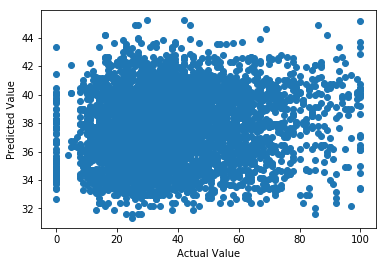

r2 score is 0.01570698860122155
cofficients are [[ 0.38588177 -0.24621276 -0.28852474 -1.3086113  -0.52224567  1.76886654
  -0.54394637]]
mean squared error is 368.99830149456227
Training data accuracy using 5-Fold Cross Validation is : 0.011168534856110756


C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


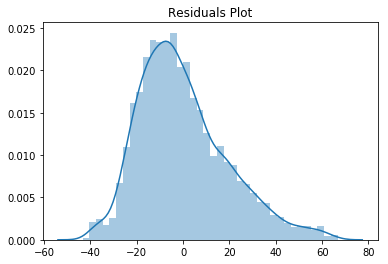

In [67]:
X = Trends_Weather[['TEMP_Avg','REALFeel_Avg','Precep','Wind','Humid','Season_l','City_l']]
y = Trends_Weather[['shows to binge watch','tv shows to watch','movies to watch']]
y = Trends_Weather[['movies to watch']]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20,random_state=42)

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

print('training shape',X_train.shape)
y_hat = reg.predict(X_train)

plt.scatter(y_train,y_hat)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()

print('r2 score is',reg.score(X_train,y_train))

print('cofficients are',reg.coef_)

from sklearn.metrics import mean_squared_error
print('mean squared error is',mean_squared_error(y_train, y_hat))

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
cv_score = cross_val_score(reg, X_train, y_train, cv=5)
print("Training data accuracy using 5-Fold Cross Validation is :", (np.mean(cv_score)))

sns.distplot(y_train - y_hat)
plt.title("Residuals Plot")
plt.show()

### It seems like Linear Regression is not the one best suited for our model and when we look at the cofficients the -ve values indicates for every unit decrease in Humidity or Wind the Movies to Watch goes down

# Ridge Regression

Training data accuracy using 5-Fold Cross Validation (ridge regression) is : 0.01135460920071163


C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


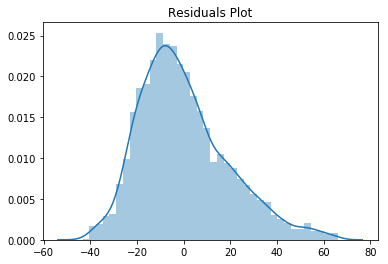

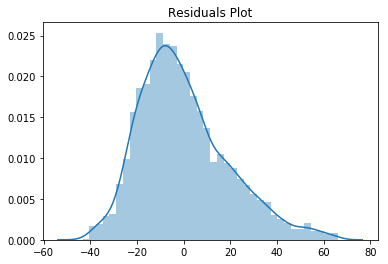

C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


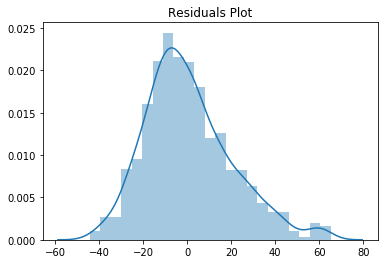

MSE test  394.2120999208112
r2 test score -0.0026550896479800024


In [68]:
from sklearn.preprocessing import PolynomialFeatures
poly_trans = PolynomialFeatures(degree=2,interaction_only=True)
x_train_poly = poly_trans.fit_transform(X_train)
x_test_poly = poly_trans.fit_transform(X_test)
poly_trans

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 1.0)
ridge_reg.fit(x_train_poly, y_train)

y_ridge_hat = ridge_reg.predict(x_train_poly)
mean_squared_error(y_train, y_ridge_hat)
ridge_cv_score = cross_val_score(ridge_reg, x_train_poly, y_train, cv=5)
print("Training data accuracy using 5-Fold Cross Validation (ridge regression) is :", (np.mean(ridge_cv_score)))

ridge_reg.score(x_train_poly,y_train)

sns.distplot(y_train - y_ridge_hat)
plt.title("Residuals Plot")
plt.show()

sns.distplot(y_train - y_ridge_hat)
plt.title("Residuals Plot")
plt.show()

# test data scores
from sklearn.metrics import r2_score
y_ridge_testhat = ridge_reg.predict(x_test_poly)
sns.distplot(y_test - y_ridge_testhat)
plt.title("Residuals Plot")
plt.show()
print('MSE test ',mean_squared_error(y_test, y_ridge_testhat))
print('r2 test score',r2_score(y_test, y_ridge_testhat))

### Ridge Regression doesnt work

Cross-validation is a vital step in evaluating a model. It maximizes the amount of data that is used to train the model, as during the course of training, the model is not only trained, but also tested on all of the available data.

# Decision Tree Regressor

C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


X_train rows       TEMP_Avg  REALFeel_Avg  Precep  Wind  Season_l  City_l  Humid
387          4             0       1     1         3       2      2
4362         2             2       1     0         2       1      2


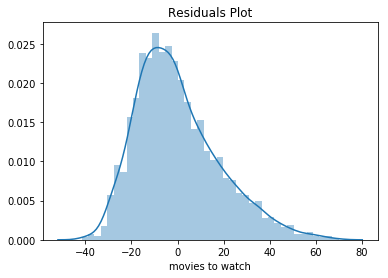

Training data accuracy using 5-Fold Cross Validation is : 0.06294234555775277
model score 0.11044699731048735


C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


r2score 0.11044699731048735


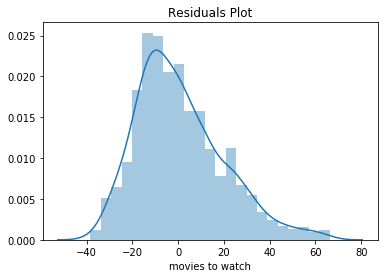

MSE test  364.468969572972
r2 test score 0.07299479789051733


In [69]:
X = Trends_Weather[['TEMP_Avg','REALFeel_Avg','Precep','Wind','Season_l','City_l','Humid']]
y = Trends_Weather[['movies to watch']]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20,random_state=42)
print('X_train rows',X_train.head(2))

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Fit regression model
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_2.fit(X_train, y_train)
y_1 = regr_2.predict(X_train)
sns.distplot(y_train['movies to watch'] - y_1)
plt.title("Residuals Plot")
plt.show()
mean_squared_error(y_train, y_1)
cv_score = cross_val_score(regr_2, X_train, y_train, cv=5)
print("Training data accuracy using 5-Fold Cross Validation is :", (np.mean(cv_score)))
print('model score',regr_2.score(X_train,y_train))
print('r2score',r2_score(y_train, y_1))

# test data scores
regr_test = DecisionTreeRegressor(max_depth=5)
regr_test.fit(X_train, y_train)
y_test_pred = regr_test.predict(X_test)
sns.distplot(y_test['movies to watch'] - y_test_pred)
plt.title("Residuals Plot")
plt.show()
print('MSE test ',mean_squared_error(y_test, y_test_pred))
print('r2 test score',r2_score(y_test, y_test_pred))



[0.13256576 0.16094509 0.15002516 0.15689308 0.1260872  0.17842741
 0.0950563 ]


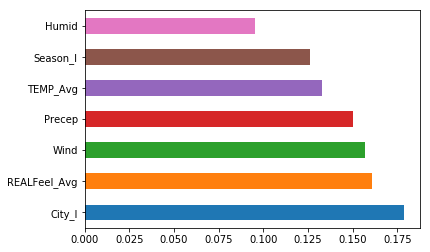

In [70]:
from sklearn.ensemble import ExtraTreesClassifier

y = Trends_Weather['movies to watch']

model = ExtraTreesClassifier(n_estimators=1000)
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

## Try for One City (If needed)

In [71]:
Chicago_Data = Trends_Weather[Trends_Weather['City'] == 'Chicago']
NY_Data = Trends_Weather[Trends_Weather['City'] == 'New York']
Seattle_Data = Trends_Weather[Trends_Weather['City'] == 'Seattle']
Denver_Data = Trends_Weather[Trends_Weather['City'] == 'Denver']
Dallas_Data = Trends_Weather[Trends_Weather['City'] == 'Dallas']


Dallas_Data


,Unnamed: 0,date,movies to watch,shows to binge watch,tv shows to watch,State,City,STATION_CODE,HEAT_INDEX_Minimum,HEAT_INDEX_Maximum,...,REAL_FEEL_TEMP_Average_Label,Wind_Label,Humid_Label,TEMP_Avg,REALFeel_Avg,Precep,Wind,Humid,Season_l,City_l
3456,3457,2016-01-01,69,0,0,TX,Dallas,DAL,54.390581,137.045668,...,Very Cool,Moderate Wind,Moderate Humidity,4,4,1,2,2,3,1
3457,3458,2016-01-02,93,0,9,TX,Dallas,DAL,41.936130,129.196688,...,Very Cool,Low Wind,Moderate Humidity,4,4,1,1,2,3,1
3458,3459,2016-01-03,85,0,0,TX,Dallas,DAL,10.237747,182.914956,...,Cool,Low Wind,Moderate Humidity,1,1,1,1,2,3,1
3459,3460,2016-01-04,44,0,8,TX,Dallas,DAL,29.372575,215.807067,...,Very Cool,Low Wind,Moderate Humidity,4,4,1,1,2,3,1
3460,3461,2016-01-05,44,0,0,TX,Dallas,DAL,52.533978,215.807067,...,Very Cool,Moderate Wind,Moderate Humidity,4,4,1,2,2,3,1
3461,3462,2016-01-06,40,0,8,TX,Dallas,DAL,57.814572,117.215693,...,Very Cool,Moderate Wind,Moderate Humidity,4,4,1,2,2,3,1
3462,3463,2016-01-07,36,0,0,TX,Dallas,DAL,-26.113578,98.440392,...,Cool,Low Wind,High Humidity,1,1,0,1,0,3,1
3463,3464,2016-01-08,28,0,16,TX,Dallas,DAL,-7.096524,117.118038,...,Cool,Low Wind,High Humidity,1,1,1,1,0,3,1
3464,3465,2016-01-09,77,0,0,TX,Dallas,DAL,7.869258,140.780430,...,Very Cool,Moderate Wind,High Humidity,4,4,1,2,0,3,1
3465,3466,2016-01-10,91,0,4,TX,Dallas,DAL,75.054510,207.540620,...,Cold,Moderate Wind,Moderate Humidity,4,0,1,2,2,3,1


# XG Boost Regressor (Whole Labelled Data)

Trainign Data Shape (4608, 7)
[11:35:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


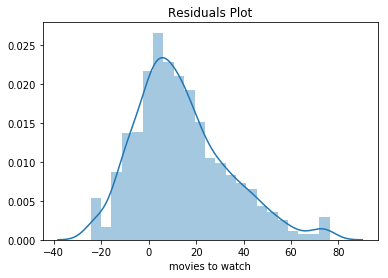

test data RMSE: 23.827554
r2 score for test data -0.44404438239885513


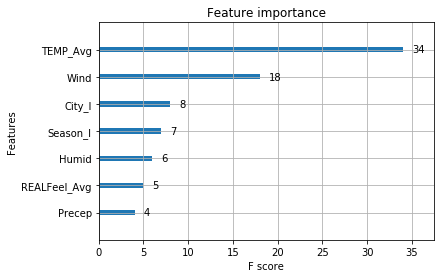

In [72]:
X = Trends_Weather[['TEMP_Avg','REALFeel_Avg','Precep','Wind','Humid','Season_l','City_l']]
y = Trends_Weather[['movies to watch']]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20,random_state=42)
print('Trainign Data Shape',X_train.shape)

import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

## reg:linear is for regression problems

xg_reg.fit(X_train,y_train)

y_test_pred = xg_reg.predict(X_test)
sns.distplot(y_test['movies to watch'] - y_test_pred)
plt.title("Residuals Plot")
plt.show()
rmse = np.sqrt(mean_squared_error(y_test,y_test_pred))
print("test data RMSE: %f" % (rmse))
print("r2 score for test data",r2_score(y_test,y_test_pred))

xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

# AdaBoost

feature importance [0.07506054 0.03538979 0.01986944 0.03787216 0.04493083 0.25874629
 0.52813094]
r2 score 0.033972399452763535
test data MSE: 379.811336


C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


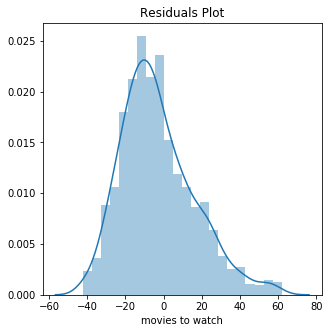

In [73]:
X = Trends_Weather[['TEMP_Avg','REALFeel_Avg','Precep','Wind','Humid','Season_l','City_l']]
y = Trends_Weather[['movies to watch']]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20,random_state=42)

from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_regression

regr = AdaBoostRegressor(random_state=0, n_estimators=100)
regr.fit(X_train, y_train)
print('feature importance',regr.feature_importances_)
y_pred = regr.predict(X_test) 
print('r2 score',r2_score(y_test, y_pred)) 
mse = (mean_squared_error(y_test,y_pred))
print("test data MSE: %f" % (mse))
sns.distplot(y_test['movies to watch'] - y_pred)
plt.title("Residuals Plot")
plt.show()

Ada Bosst and XG Boost isnt working 

## Shows to Binge Watch

## Decision Tree Regressor

C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


X_train rows       TEMP_Avg  REALFeel_Avg  Precep  Wind  Season_l  City_l  Humid
387          4             0       1     1         3       2      2
4362         2             2       1     0         2       1      2


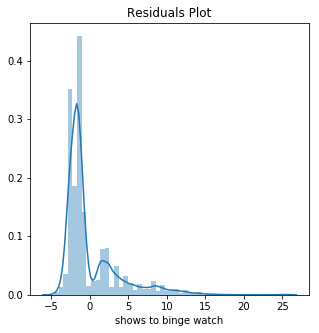

Training data accuracy using 5-Fold Cross Validation is : -0.00573380063828397
model score 0.04081125050287904
r2score 0.04081125050287904


C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


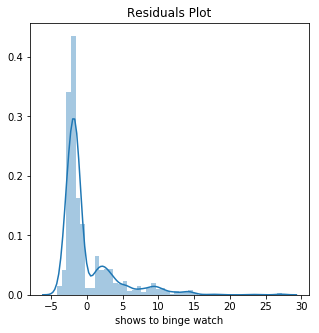

MSE test  15.115964241633101
r2 test score 0.0024790462500429156


In [74]:
X = Trends_Weather[['TEMP_Avg','REALFeel_Avg','Precep','Wind','Season_l','City_l','Humid']]
y = Trends_Weather[['shows to binge watch']]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20,random_state=42)
print('X_train rows',X_train.head(2))

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Fit regression model
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_2.fit(X_train, y_train)
y_1 = regr_2.predict(X_train)
sns.distplot(y_train['shows to binge watch'] - y_1)
plt.title("Residuals Plot")
plt.show()
mean_squared_error(y_train, y_1)
cv_score = cross_val_score(regr_2, X_train, y_train, cv=5)
print("Training data accuracy using 5-Fold Cross Validation is :", (np.mean(cv_score)))
print('model score',regr_2.score(X_train,y_train))
print('r2score',r2_score(y_train, y_1))

# test data scores
regr_test = DecisionTreeRegressor(max_depth=5)
regr_test.fit(X_train, y_train)
y_test_pred = regr_test.predict(X_test)
sns.distplot(y_test['shows to binge watch'] - y_test_pred)
plt.title("Residuals Plot")
plt.show()
print('MSE test ',mean_squared_error(y_test, y_test_pred))
print('r2 test score',r2_score(y_test, y_test_pred))


## Linear Regression

training shape (4608, 7)


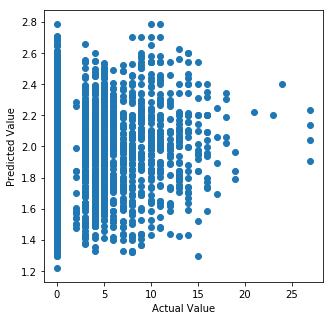

r2 score is 0.005752636446755055
cofficients are [[ 0.006697    0.02402256  0.16107538 -0.10239655 -0.09853164  0.20216751
   0.05406294]]
mean squared error is 13.491199876787972
Training data accuracy using 5-Fold Cross Validation is : -0.000663755609840289


C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


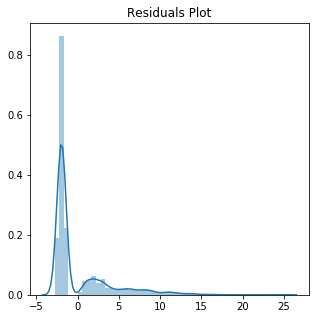

In [75]:
X = Trends_Weather[['TEMP_Avg','REALFeel_Avg','Precep','Wind','Humid','Season_l','City_l']]
y = Trends_Weather[['shows to binge watch','tv shows to watch','movies to watch']]
y = Trends_Weather[['shows to binge watch']]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20,random_state=42)

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

print('training shape',X_train.shape)
y_hat = reg.predict(X_train)

plt.scatter(y_train,y_hat)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()

print('r2 score is',reg.score(X_train,y_train))

print('cofficients are',reg.coef_)

from sklearn.metrics import mean_squared_error
print('mean squared error is',mean_squared_error(y_train, y_hat))

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
cv_score = cross_val_score(reg, X_train, y_train, cv=5)
print("Training data accuracy using 5-Fold Cross Validation is :", (np.mean(cv_score)))

sns.distplot(y_train - y_hat)
plt.title("Residuals Plot")
plt.show()

# Ridge

Training data accuracy using 5-Fold Cross Validation (ridge regression) is : -0.00806631037991179


C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


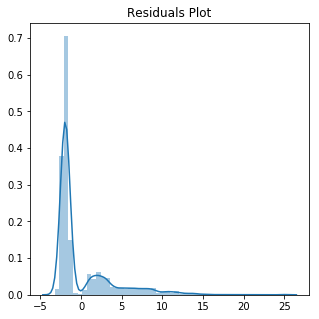

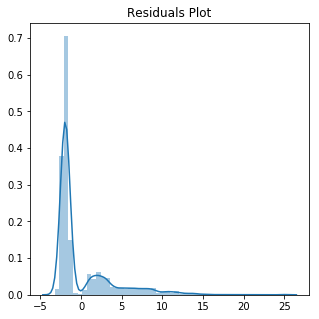

C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


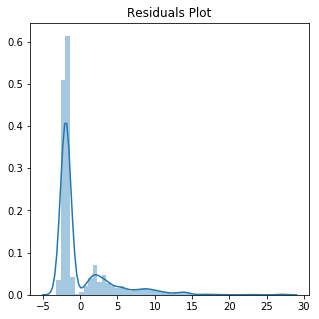

MSE test  15.103111233880206
r2 test score 0.003327231939508124


In [76]:
from sklearn.preprocessing import PolynomialFeatures
poly_trans = PolynomialFeatures(degree=2,interaction_only=True)
x_train_poly = poly_trans.fit_transform(X_train)
x_test_poly = poly_trans.fit_transform(X_test)
poly_trans

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 1.0)
ridge_reg.fit(x_train_poly, y_train)

y_ridge_hat = ridge_reg.predict(x_train_poly)
mean_squared_error(y_train, y_ridge_hat)
ridge_cv_score = cross_val_score(ridge_reg, x_train_poly, y_train, cv=5)
print("Training data accuracy using 5-Fold Cross Validation (ridge regression) is :", (np.mean(ridge_cv_score)))

ridge_reg.score(x_train_poly,y_train)

sns.distplot(y_train - y_ridge_hat)
plt.title("Residuals Plot")
plt.show()

sns.distplot(y_train - y_ridge_hat)
plt.title("Residuals Plot")
plt.show()

# test data scores
from sklearn.metrics import r2_score
y_ridge_testhat = ridge_reg.predict(x_test_poly)
sns.distplot(y_test - y_ridge_testhat)
plt.title("Residuals Plot")
plt.show()
print('MSE test ',mean_squared_error(y_test, y_ridge_testhat))
print('r2 test score',r2_score(y_test, y_ridge_testhat))

## AdaBoost

C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


feature importance [0.06061726 0.06026397 0.00077331 0.08841252 0.07312391 0.23557593
 0.48123311]
r2 score -0.07898275777884023
test data MSE: 16.350398


C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


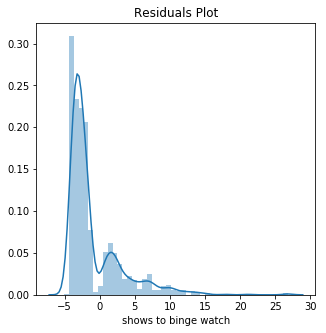

In [77]:
X = Trends_Weather[['TEMP_Avg','REALFeel_Avg','Precep','Wind','Humid','Season_l','City_l']]
y = Trends_Weather[['shows to binge watch']]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20,random_state=42)

from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_regression

regr = AdaBoostRegressor(random_state=0, n_estimators=100)
regr.fit(X_train, y_train)
print('feature importance',regr.feature_importances_)
y_pred = regr.predict(X_test) 
print('r2 score',r2_score(y_test, y_pred)) 
mse = (mean_squared_error(y_test,y_pred))
print("test data MSE: %f" % (mse))
sns.distplot(y_test['shows to binge watch'] - y_pred)
plt.title("Residuals Plot")
plt.show()

## XGBoost

Trainign Data Shape (4608, 7)
[11:35:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


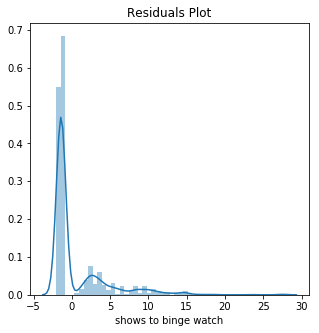

test data RMSE: 3.904442
r2 score for test data -0.006014336486060312


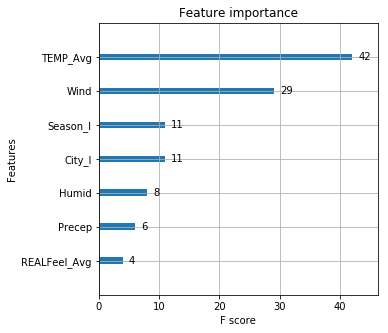

In [78]:
X = Trends_Weather[['TEMP_Avg','REALFeel_Avg','Precep','Wind','Humid','Season_l','City_l']]
y = Trends_Weather[['shows to binge watch']]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20,random_state=42)
print('Trainign Data Shape',X_train.shape)

import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

## reg:linear is for regression problems

xg_reg.fit(X_train,y_train)

y_test_pred = xg_reg.predict(X_test)
sns.distplot(y_test['shows to binge watch'] - y_test_pred)
plt.title("Residuals Plot")
plt.show()
rmse = np.sqrt(mean_squared_error(y_test,y_test_pred))
print("test data RMSE: %f" % (rmse))
print("r2 score for test data",r2_score(y_test,y_test_pred))

xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

## Artice for Reg Analysis: https://statisticsbyjim.com/regression/when-use-regression-analysis/

## One City

# Chicago

training shape (921, 3)


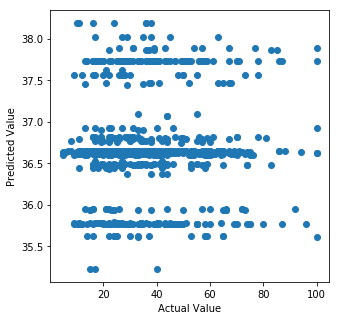

r2 score is 0.0009491350383667996
cofficients are [[ 0.28388087 -0.27508896  0.16343203]]
mean squared error is 322.4340997621343
Training data accuracy using 5-Fold Cross Validation is : -0.04008104148527898


C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


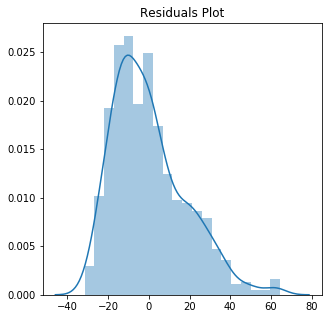

In [79]:
X = Chicago_Data[['TEMP_Avg','REALFeel_Avg','Precep']]
y = Chicago_Data[['shows to binge watch','tv shows to watch','movies to watch']]
y = Chicago_Data[['movies to watch']]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20,random_state=42)

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

print('training shape',X_train.shape)
y_hat = reg.predict(X_train)

plt.scatter(y_train,y_hat)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()

print('r2 score is',reg.score(X_train,y_train))

print('cofficients are',reg.coef_)

from sklearn.metrics import mean_squared_error
print('mean squared error is',mean_squared_error(y_train, y_hat))

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
cv_score = cross_val_score(reg, X_train, y_train, cv=5)
print("Training data accuracy using 5-Fold Cross Validation is :", (np.mean(cv_score)))

sns.distplot(y_train - y_hat)
plt.title("Residuals Plot")
plt.show()

# Target Variables: Movies To Watch, TV Shows to Watch, Shows to Binge Watch

In [80]:
Trends_Weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5760 entries, 0 to 5759
Data columns (total 46 columns):
Unnamed: 0                       5760 non-null int64
date                             5760 non-null datetime64[ns]
movies to watch                  5760 non-null int64
shows to binge watch             5760 non-null int64
tv shows to watch                5760 non-null int64
State                            5760 non-null object
City                             5760 non-null object
STATION_CODE                     5760 non-null object
HEAT_INDEX_Minimum               5760 non-null float64
HEAT_INDEX_Maximum               5760 non-null float64
HEAT_INDEX_Average               5760 non-null float64
CLOUD_COVER_Minimum              5760 non-null float64
CLOUD_COVER_Maximum              5760 non-null float64
CLOUD_COVER_Average              5760 non-null float64
TEMPERATURE_Minimum              5760 non-null float64
TEMPERATURE_Maximum              5760 non-null float64
TEMPERATURE_Avera

In [81]:
avg_metric_precep_city = Trends_Weather.groupby(['City','Precep_Label'], as_index=False).agg(
    {"movies to watch": "mean","tv shows to watch":"mean","shows to binge watch":"mean"})
avg_metric_city = Trends_Weather.groupby(['City'], as_index=False).agg(
    {"movies to watch": "mean","tv shows to watch":"mean","shows to binge watch":"mean"})
avg_metric_city = avg_metric_city.rename(index = str,columns={"movies to watch":"average_movies_by_city","tv shows to watch":"average_tv_shows_to_watch_by_city","shows to binge watch":"average_shows_to_binge_by_city"})
Rain_Effect_Metric = pd.merge(avg_metric_precep_city,avg_metric_city,left_on='City',right_on='City')
Rain_Effect_Metric['%_movies_to_watch'] = ((Rain_Effect_Metric['average_movies_by_city'] - Rain_Effect_Metric['movies to watch'])/Rain_Effect_Metric['average_movies_by_city'])*100
Rain_Effect_Metric['%_tvshows_to_watch'] = ((Rain_Effect_Metric['average_tv_shows_to_watch_by_city'] - Rain_Effect_Metric['tv shows to watch'])/Rain_Effect_Metric['average_tv_shows_to_watch_by_city'])*100
Rain_Effect_Metric['%_shows_to_binge_watch'] = ((Rain_Effect_Metric['average_shows_to_binge_by_city'] - Rain_Effect_Metric['shows to binge watch'])/Rain_Effect_Metric['average_shows_to_binge_by_city'])*100
Rain_Effect_Metric = Rain_Effect_Metric.rename(index = str,columns={"Precep_Label":"Precip","%_movies_to_watch":"Movies Search","%_tvshows_to_watch":"TV Shows Search","%_shows_to_binge_watch":"Binge Watch Shows Search"})
Rain_Effect_Metric['Movies Search'] = -(Rain_Effect_Metric['Movies Search'])
Rain_Effect_Metric['TV Shows Search'] = -(Rain_Effect_Metric['TV Shows Search'])
Rain_Effect_Metric['Binge Watch Shows Search'] = -(Rain_Effect_Metric['Binge Watch Shows Search'])

In [82]:
avg_metric_precep_city

,City,Precep_Label,movies to watch,tv shows to watch,shows to binge watch
0,Chicago,Heavy Rain,37.544000,5.304000,2.288000
1,Chicago,Light Rain,36.756818,5.579545,2.167045
2,Chicago,Moderate Rain,38.510204,6.095238,2.197279
3,Dallas,Heavy Rain,43.658333,4.366667,1.625000
4,Dallas,Light Rain,43.527404,4.557394,1.468459
5,Dallas,Moderate Rain,41.800000,4.107692,1.369231
6,Denver,Heavy Rain,30.739130,4.913043,1.739130
7,Denver,Light Rain,30.579147,3.976303,1.565877
8,Denver,Moderate Rain,33.797297,5.081081,2.743243
9,New York,Heavy Rain,44.306122,7.414966,3.136054


In [83]:
avg_metric_city

,City,average_movies_by_city,average_tv_shows_to_watch_by_city,average_shows_to_binge_by_city
0,Chicago,37.065972,5.615451,2.184028
1,Dallas,43.443576,4.512153,1.479167
2,Denver,30.789062,4.065972,1.644965
3,New York,42.267361,6.876736,2.476562
4,Seattle,35.478299,6.122396,1.980035


In [84]:
Rain_Effect_Metric

,City,Precip,movies to watch,tv shows to watch,shows to binge watch,average_movies_by_city,average_tv_shows_to_watch_by_city,average_shows_to_binge_by_city,Movies Search,TV Shows Search,Binge Watch Shows Search
0,Chicago,Heavy Rain,37.544000,5.304000,2.288000,37.065972,5.615451,2.184028,1.289667,-5.546329,4.760572
1,Chicago,Light Rain,36.756818,5.579545,2.167045,37.065972,5.615451,2.184028,-0.834064,-0.639413,-0.777569
2,Chicago,Moderate Rain,38.510204,6.095238,2.197279,37.065972,5.615451,2.184028,3.896382,8.544045,0.606729
3,Dallas,Heavy Rain,43.658333,4.366667,1.625000,43.443576,4.512153,1.479167,0.494335,-3.224317,9.859155
4,Dallas,Light Rain,43.527404,4.557394,1.468459,43.443576,4.512153,1.479167,0.192958,1.002653,-0.723888
5,Dallas,Moderate Rain,41.800000,4.107692,1.369231,43.443576,4.512153,1.479167,-3.783244,-8.963803,-7.432286
6,Denver,Heavy Rain,30.739130,4.913043,1.739130,30.789062,4.065972,1.644965,-0.162175,20.833179,5.724446
7,Denver,Light Rain,30.579147,3.976303,1.565877,30.789062,4.065972,1.644965,-0.681786,-2.205350,-4.807913
8,Denver,Moderate Rain,33.797297,5.081081,2.743243,30.789062,4.065972,1.644965,9.770466,24.965957,66.766027
9,New York,Heavy Rain,44.306122,7.414966,3.136054,42.267361,6.876736,2.476562,4.823489,7.826822,26.629327


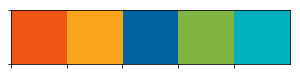

In [85]:
## Accuweather Colors
flatui = ["#f05514", "#faa519","#0064a0","#82b441","#00afbe"]
k=sns.set_palette(flatui)
sns.palplot(sns.color_palette())

# Visualization ~ City ~ Precepitation

In [86]:
import math
# Set plotting style
sns.set_style('white')

def roundup(x):
    return 100 + round(float(math.ceil(x / 100.0)),3) * 100 
g = sns.factorplot("City", ("Movies Search"), "Precip", data=Rain_Effect_Metric,
               kind='bar',  size=4, aspect=2,palette=sns.color_palette())
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Rain Effect on Movies to Watch Search Trend by City',fontsize=13)

# Get current axis on current figure
ax = plt.gca()

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), "%.2f" % round(float(p.get_height()),3)+'%', 
            fontsize=12, color='black', ha='center', va='bottom')

g.fig.savefig('//ictfilesrv/wta/Accu_Internal_D3_Projects/Pavani/ATT_GoogleData/Data/GoogleTrends/images/movies/PrecipCity.png')   # save the figure to file
plt.close(g.fig)

import math
# Set plotting style
sns.set_style('white')

def roundup(x):
    return 100 + round(float(math.ceil(x / 100.0)),3) * 100 
g = sns.factorplot("City", ("TV Shows Search"), "Precip", data=Rain_Effect_Metric,
               kind='bar',  size=4, aspect=2,palette=sns.color_palette())
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Rain Effect on TV Shows to Watch Search Trend by City',fontsize=13)

# Get current axis on current figure
ax = plt.gca()

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), "%.2f" % round(float(p.get_height()),3)+'%', 
            fontsize=12, color='black', ha='center', va='bottom')

g.fig.savefig('//ictfilesrv/wta/Accu_Internal_D3_Projects/Pavani/ATT_GoogleData/Data/GoogleTrends/images/tvshows/PrecipCity.png')   # save the figure to file
plt.close(g.fig)

import math
# Set plotting style
sns.set_style('white')

def roundup(x):
    return 100 + round(float(math.ceil(x / 100.0)),3) * 100 
g = sns.factorplot("City", ("Binge Watch Shows Search"), "Precip", data=Rain_Effect_Metric,
               kind='bar',  size=4, aspect=2,palette=sns.color_palette())
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Rain Effect on Shows to Binge Watch Search Trend by City',fontsize=13)

# Get current axis on current figure
ax = plt.gca()

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), "%.2f" % round(float(p.get_height()),3)+'%', 
            fontsize=12, color='black', ha='center', va='bottom')

g.fig.savefig('//ictfilesrv/wta/Accu_Internal_D3_Projects/Pavani/ATT_GoogleData/Data/GoogleTrends/images/showsbinge/ShowsBingeCity.png')   # save the figure to file
plt.close(g.fig)

C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\pavani.n

# Seasonality Play a Role in Rain Effecting the Search Trend

In [87]:
avg_metric_precep_city = Trends_Weather.groupby(['Season','Precep_Label'], as_index=False).agg(
    {"movies to watch": "mean","tv shows to watch":"mean","shows to binge watch":"mean"})
avg_metric_city = Trends_Weather.groupby(['Season'], as_index=False).agg(
    {"movies to watch": "mean","tv shows to watch":"mean","shows to binge watch":"mean"})
avg_metric_city = avg_metric_city.rename(index = str,columns={"movies to watch":"average_movies_by_city","tv shows to watch":"average_tv_shows_to_watch_by_city","shows to binge watch":"average_shows_to_binge_by_city"})
Rain_Effect_Season = pd.merge(avg_metric_precep_city,avg_metric_city,left_on='Season',right_on='Season')
Rain_Effect_Season['%_movies_to_watch'] = ((Rain_Effect_Season['average_movies_by_city'] - Rain_Effect_Season['movies to watch'])/Rain_Effect_Season['average_movies_by_city'])*100
Rain_Effect_Season['%_tvshows_to_watch'] = ((Rain_Effect_Season['average_tv_shows_to_watch_by_city'] - Rain_Effect_Season['tv shows to watch'])/Rain_Effect_Season['average_tv_shows_to_watch_by_city'])*100
Rain_Effect_Season['%_shows_to_binge_watch'] = ((Rain_Effect_Season['average_shows_to_binge_by_city'] - Rain_Effect_Season['shows to binge watch'])/Rain_Effect_Season['average_shows_to_binge_by_city'])*100
Rain_Effect_Season = Rain_Effect_Season.rename(index = str,columns={"Precep_Label":"Precip","%_movies_to_watch":"Movies Search","%_tvshows_to_watch":"TV Shows Search","%_shows_to_binge_watch":"Binge Watch Shows Search"})
Rain_Effect_Season['Movies Search'] = -(Rain_Effect_Season['Movies Search'])
Rain_Effect_Season['TV Shows Search'] = -(Rain_Effect_Season['TV Shows Search'])
Rain_Effect_Season['Binge Watch Shows Search'] = -(Rain_Effect_Season['Binge Watch Shows Search'])

In [88]:
Rain_Effect_Season

,Season,Precip,movies to watch,tv shows to watch,shows to binge watch,average_movies_by_city,average_tv_shows_to_watch_by_city,average_shows_to_binge_by_city,Movies Search,TV Shows Search,Binge Watch Shows Search
0,Fall,Heavy Rain,40.112903,6.580645,2.241935,35.884982,5.812454,1.709890,11.781869,13.216292,31.115764
1,Fall,Light Rain,35.127057,5.536563,1.600548,35.884982,5.812454,1.709890,-2.112095,-4.746552,-6.394660
2,Fall,Moderate Rain,37.959184,7.217687,2.074830,35.884982,5.812454,1.709890,5.780139,24.176240,21.342882
3,Spring,Heavy Rain,37.215517,5.525862,1.422414,35.718116,4.971739,1.608696,4.192274,11.145455,-11.579683
4,Spring,Light Rain,35.721965,4.841520,1.572753,35.718116,4.971739,1.608696,0.010776,-2.619188,-2.234301
5,Spring,Moderate Rain,34.756757,5.383784,1.935135,35.718116,4.971739,1.608696,-2.691517,8.287737,20.292184
6,Summer,Heavy Rain,41.543478,5.934783,2.557971,38.018116,5.689130,2.157246,9.272849,4.317921,18.575747
7,Summer,Light Rain,37.466312,5.613475,2.047872,38.018116,5.689130,2.157246,-1.451424,-1.329821,-5.070076
8,Summer,Moderate Rain,39.210526,6.140351,2.754386,38.018116,5.689130,2.157246,3.136427,7.931273,27.680639
9,Winter,Heavy Rain,41.932331,4.924812,2.255639,41.003058,5.308869,2.274006,2.266350,-7.234243,-0.807694


# Visualizations ~ Season ~ Precipitation

In [89]:
#Movies to Watch
import math
# Set plotting style
sns.set_style('white')

def roundup(x):
    return 100 + round(float(math.ceil(x / 100.0)),3) * 100 
g = sns.factorplot("Precip", ("Movies Search"), "Season", data=Rain_Effect_Season,
               kind='bar',  size=4, aspect=2,palette=sns.color_palette())
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Rain Effect on Movies to Watch Search Trend by Season',fontsize=13)

# Get current axis on current figure
ax = plt.gca()

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), "%.2f" % round(float(p.get_height()),3)+'%', 
            fontsize=12, color='black', ha='center', va='bottom')

g.fig.savefig('//ictfilesrv/wta/Accu_Internal_D3_Projects/Pavani/ATT_GoogleData/Data/GoogleTrends/images/movies/PrecipSeason.png')   # save the figure to file
plt.close(g.fig)

#@TV Shows to Watch
def roundup(x):
    return 100 + round(float(math.ceil(x / 100.0)),3) * 100 
g = sns.factorplot("Precip", ("TV Shows Search"), "Season", data=Rain_Effect_Season,
               kind='bar',  size=4, aspect=2,palette=sns.color_palette())
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Rain Effect on TV Shows to Watch Search Trend by Season',fontsize=13)

# Get current axis on current figure
ax = plt.gca()

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), "%.2f" % round(float(p.get_height()),3)+'%', 
            fontsize=12, color='black', ha='center', va='bottom')

g.fig.savefig('//ictfilesrv/wta/Accu_Internal_D3_Projects/Pavani/ATT_GoogleData/Data/GoogleTrends/images/tvshows/PrecipSeason.png')   # save the figure to file
plt.close(g.fig)

#ShowsToBingeWatch

def roundup(x):
    return 100 + round(float(math.ceil(x / 100.0)),3) * 100 
g = sns.factorplot("Precip", ("Binge Watch Shows Search"), "Season", data=Rain_Effect_Season,
               kind='bar',  size=4, aspect=2,palette=sns.color_palette())
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Rain Effect on Shows to Binge Watch Search Trend by Season',fontsize=13)

# Get current axis on current figure
ax = plt.gca()

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), "%.2f" % round(float(p.get_height()),3)+'%', 
            fontsize=12, color='black', ha='center', va='bottom')

g.fig.savefig('//ictfilesrv/wta/Accu_Internal_D3_Projects/Pavani/ATT_GoogleData/Data/GoogleTrends/images/showsbinge/PrecipSeason.png')   # save the figure to file
plt.close(g.fig)

C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\pavani.n

# Seasonality Effect on Rain By City

In [90]:
Chicago_Data = Trends_Weather[Trends_Weather['City'] == 'Chicago']
NY_Data = Trends_Weather[Trends_Weather['City'] == 'New York']
Seattle_Data = Trends_Weather[Trends_Weather['City'] == 'Seattle']
Denver_Data = Trends_Weather[Trends_Weather['City'] == 'Denver']
Dallas_Data = Trends_Weather[Trends_Weather['City'] == 'Dallas']


# Chicago

In [91]:

avg_metric_precep_city = Chicago_Data.groupby(['Season','Precep_Label'], as_index=False).agg(
    {"movies to watch": "mean","tv shows to watch":"mean","shows to binge watch":"mean"})
avg_metric_city = Chicago_Data.groupby(['Season'], as_index=False).agg(
    {"movies to watch": "mean","tv shows to watch":"mean","shows to binge watch":"mean"})
avg_metric_city = avg_metric_city.rename(index = str,columns={"movies to watch":"average_movies_by_city","tv shows to watch":"average_tv_shows_to_watch_by_city","shows to binge watch":"average_shows_to_binge_by_city"})
Rain_Effect_Season_Chicago = pd.merge(avg_metric_precep_city,avg_metric_city,left_on='Season',right_on='Season')
Rain_Effect_Season_Chicago['%_movies_to_watch'] = ((Rain_Effect_Season_Chicago['average_movies_by_city'] - Rain_Effect_Season_Chicago['movies to watch'])/Rain_Effect_Season_Chicago['average_movies_by_city'])*100
Rain_Effect_Season_Chicago['%_tvshows_to_watch'] = ((Rain_Effect_Season_Chicago['average_tv_shows_to_watch_by_city'] - Rain_Effect_Season_Chicago['tv shows to watch'])/Rain_Effect_Season_Chicago['average_tv_shows_to_watch_by_city'])*100
Rain_Effect_Season_Chicago['%_shows_to_binge_watch'] = ((Rain_Effect_Season_Chicago['average_shows_to_binge_by_city'] - Rain_Effect_Season_Chicago['shows to binge watch'])/Rain_Effect_Season_Chicago['average_shows_to_binge_by_city'])*100
Rain_Effect_Season_Chicago = Rain_Effect_Season_Chicago.rename(index = str,columns={"Precep_Label":"Precip","%_movies_to_watch":"Movies Search","%_tvshows_to_watch":"TV Shows Search","%_shows_to_binge_watch":"Binge Watch Shows Search"})
Rain_Effect_Season_Chicago['Movies Search'] = -(Rain_Effect_Season_Chicago['Movies Search'])
Rain_Effect_Season_Chicago['TV Shows Search'] = -(Rain_Effect_Season_Chicago['TV Shows Search'])
Rain_Effect_Season_Chicago['Binge Watch Shows Search'] = -(Rain_Effect_Season_Chicago['Binge Watch Shows Search'])

In [92]:
Rain_Effect_Season_Chicago

,Season,Precip,movies to watch,tv shows to watch,shows to binge watch,average_movies_by_city,average_tv_shows_to_watch_by_city,average_shows_to_binge_by_city,Movies Search,TV Shows Search,Binge Watch Shows Search
0,Fall,Heavy Rain,44.583333,7.000000,2.625000,37.842491,6.776557,2.347985,17.812893,3.297297,11.797972
1,Fall,Light Rain,36.620853,6.668246,2.331754,37.842491,6.776557,2.347985,-3.228217,-1.598309,-0.691307
2,Fall,Moderate Rain,40.368421,7.236842,2.263158,37.842491,6.776557,2.347985,6.674852,6.792319,-3.612776
3,Spring,Heavy Rain,33.289474,5.710526,1.210526,31.543478,4.750000,1.307971,5.535203,20.221607,-7.450066
4,Spring,Light Rain,31.388060,4.442786,1.308458,31.543478,4.750000,1.307971,-0.492712,-6.467662,0.037210
5,Spring,Moderate Rain,30.594595,5.432432,1.405405,31.543478,4.750000,1.307971,-3.008177,14.366999,7.449278
6,Summer,Heavy Rain,38.700000,4.825000,3.150000,38.528986,5.797101,2.503623,0.443859,-16.768750,25.817656
7,Summer,Light Rain,38.490000,5.900000,2.460000,38.528986,5.797101,2.503623,-0.101185,1.775000,-1.742402
8,Summer,Moderate Rain,38.555556,6.305556,2.027778,38.528986,5.797101,2.503623,0.068961,8.770833,-19.006271
9,Winter,Heavy Rain,35.217391,3.695652,2.217391,39.844037,5.223242,2.516820,-11.611889,-29.246003,-11.897089


In [93]:
import math
# Set plotting style
sns.set_style('white')

def roundup(x):
    return 100 + round(float(math.ceil(x / 100.0)),3) * 100 
g = sns.factorplot("Precip", ("Movies Search"), "Season", data=Rain_Effect_Season_Chicago,
               kind='bar', size=4, aspect=2,palette=sns.color_palette())
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Chicago:Rain Effect on Movies to Watch Search Trend by Season',fontsize=13)

# Get current axis on current figure
ax = plt.gca()

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), "%.2f" % round(float(p.get_height()),3)+'%', 
            fontsize=12, color='black', ha='center', va='bottom')

g.fig.savefig('//ictfilesrv/wta/Accu_Internal_D3_Projects/Pavani/ATT_GoogleData/Data/GoogleTrends/images/Chicago/Precip/Movies.png')   # save the figure to file
plt.close(g.fig)


import math
# Set plotting style
sns.set_style('white')

def roundup(x):
    return 100 + round(float(math.ceil(x / 100.0)),3) * 100 
g = sns.factorplot("Precip", ("TV Shows Search"), "Season", data=Rain_Effect_Season_Chicago,
               kind='bar', size=4, aspect=2,palette=sns.color_palette())
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Chicago:Rain Effect on TV Shows to Watch Search Trend by Season',fontsize=13)

# Get current axis on current figure
ax = plt.gca()

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), "%.2f" % round(float(p.get_height()),3)+'%', 
            fontsize=12, color='black', ha='center', va='bottom')

g.fig.savefig('//ictfilesrv/wta/Accu_Internal_D3_Projects/Pavani/ATT_GoogleData/Data/GoogleTrends/images/Chicago/Precip/TvShows.png')   # save the figure to file
plt.close(g.fig)

import math
# Set plotting style
sns.set_style('white')

def roundup(x):
    return 100 + round(float(math.ceil(x / 100.0)),3) * 100 
g = sns.factorplot("Precip", ("Binge Watch Shows Search"), "Season", data=Rain_Effect_Season_Chicago,
               kind='bar', size=4, aspect=2,palette=sns.color_palette())
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Chicago:Rain Effect on Shows to Binge Watch Search Trend by Season',fontsize=13)

# Get current axis on current figure
ax = plt.gca()

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), "%.2f" % round(float(p.get_height()),3)+'%', 
            fontsize=12, color='black', ha='center', va='bottom')

g.fig.savefig('//ictfilesrv/wta/Accu_Internal_D3_Projects/Pavani/ATT_GoogleData/Data/GoogleTrends/images/Chicago/Precip/BingeShows.png')   # save the figure to file
plt.close(g.fig)

C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\pavani.n

# NYC

In [94]:

avg_metric_precep_city = NY_Data.groupby(['Season','Precep_Label'], as_index=False).agg(
    {"movies to watch": "mean","tv shows to watch":"mean","shows to binge watch":"mean"})
avg_metric_city = NY_Data.groupby(['Season'], as_index=False).agg(
    {"movies to watch": "mean","tv shows to watch":"mean","shows to binge watch":"mean"})
avg_metric_city = avg_metric_city.rename(index = str,columns={"movies to watch":"average_movies_by_city","tv shows to watch":"average_tv_shows_to_watch_by_city","shows to binge watch":"average_shows_to_binge_by_city"})
Rain_Effect_Season_NY = pd.merge(avg_metric_precep_city,avg_metric_city,left_on='Season',right_on='Season')
Rain_Effect_Season_NY['%_movies_to_watch'] = ((Rain_Effect_Season_NY['average_movies_by_city'] - Rain_Effect_Season_NY['movies to watch'])/Rain_Effect_Season_NY['average_movies_by_city'])*100
Rain_Effect_Season_NY['%_tvshows_to_watch'] = ((Rain_Effect_Season_NY['average_tv_shows_to_watch_by_city'] - Rain_Effect_Season_NY['tv shows to watch'])/Rain_Effect_Season_NY['average_tv_shows_to_watch_by_city'])*100
Rain_Effect_Season_NY['%_shows_to_binge_watch'] = ((Rain_Effect_Season_NY['average_shows_to_binge_by_city'] - Rain_Effect_Season_NY['shows to binge watch'])/Rain_Effect_Season_NY['average_shows_to_binge_by_city'])*100
Rain_Effect_Season_NY = Rain_Effect_Season_NY.rename(index = str,columns={"Precep_Label":"Precip","%_movies_to_watch":"Movies Search","%_tvshows_to_watch":"TV Shows Search","%_shows_to_binge_watch":"Binge Watch Shows Search"})
Rain_Effect_Season_NY['Movies Search'] = -(Rain_Effect_Season_NY['Movies Search'])
Rain_Effect_Season_NY['TV Shows Search'] = -(Rain_Effect_Season_NY['TV Shows Search'])
Rain_Effect_Season_NY['Binge Watch Shows Search'] = -(Rain_Effect_Season_NY['Binge Watch Shows Search'])

In [95]:
import math
# Set plotting style
sns.set_style('white')

def roundup(x):
    return 100 + round(float(math.ceil(x / 100.0)),3) * 100 
g = sns.factorplot("Precip", ("Movies Search"), "Season", data=Rain_Effect_Season_NY,
               kind='bar', size=4, aspect=2,palette=sns.color_palette())
plt.subplots_adjust(top=0.9)
g.fig.suptitle('NYC:Rain Effect on Movies to Watch Search Trend by Season',fontsize=13)

# Get current axis on current figure
ax = plt.gca()

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), "%.2f" % round(float(p.get_height()),3)+'%', 
            fontsize=12, color='black', ha='center', va='bottom')

g.fig.savefig('//ictfilesrv/wta/Accu_Internal_D3_Projects/Pavani/ATT_GoogleData/Data/GoogleTrends/images/NY/Precip/Movies.png')   # save the figure to file
plt.close(g.fig)

import math
# Set plotting style
sns.set_style('white')

def roundup(x):
    return 100 + round(float(math.ceil(x / 100.0)),3) * 100 
g = sns.factorplot("Precip", ("TV Shows Search"), "Season", data=Rain_Effect_Season_NY,
               kind='bar', size=4, aspect=2,palette=sns.color_palette())
plt.subplots_adjust(top=0.9)
g.fig.suptitle('NYC:Rain Effect on TV Shows to Watch Search Trend by Season',fontsize=13)

# Get current axis on current figure
ax = plt.gca()

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), "%.2f" % round(float(p.get_height()),3)+'%', 
            fontsize=12, color='black', ha='center', va='bottom')

g.fig.savefig('//ictfilesrv/wta/Accu_Internal_D3_Projects/Pavani/ATT_GoogleData/Data/GoogleTrends/images/NY/Precip/TvShows.png')   # save the figure to file
plt.close(g.fig)

import math
# Set plotting style
sns.set_style('white')

def roundup(x):
    return 100 + round(float(math.ceil(x / 100.0)),3) * 100 
g = sns.factorplot("Precip", ("Binge Watch Shows Search"), "Season", data=Rain_Effect_Season_NY,
               kind='bar',  size=4, aspect=2,palette=sns.color_palette())
plt.subplots_adjust(top=0.9)
g.fig.suptitle('NYC:Rain Effect on Shows to Binge Watch Search Trend by Season',fontsize=13)

# Get current axis on current figure
ax = plt.gca()

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), "%.2f" % round(float(p.get_height()),3)+'%', 
            fontsize=12, color='black', ha='center', va='bottom')

g.fig.savefig('//ictfilesrv/wta/Accu_Internal_D3_Projects/Pavani/ATT_GoogleData/Data/GoogleTrends/images/NY/Precip/BingeShows.png')   # save the figure to file
plt.close(g.fig)

C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\pavani.n

# Dallas

In [96]:

avg_metric_precep_city = Dallas_Data.groupby(['Season','Precep_Label'], as_index=False).agg(
    {"movies to watch": "mean","tv shows to watch":"mean","shows to binge watch":"mean"})
avg_metric_city = Dallas_Data.groupby(['Season'], as_index=False).agg(
    {"movies to watch": "mean","tv shows to watch":"mean","shows to binge watch":"mean"})
avg_metric_city = avg_metric_city.rename(index = str,columns={"movies to watch":"average_movies_by_city","tv shows to watch":"average_tv_shows_to_watch_by_city","shows to binge watch":"average_shows_to_binge_by_city"})
Rain_Effect_Season_Dallas = pd.merge(avg_metric_precep_city,avg_metric_city,left_on='Season',right_on='Season')
Rain_Effect_Season_Dallas['%_movies_to_watch'] = ((Rain_Effect_Season_Dallas['average_movies_by_city'] - Rain_Effect_Season_Dallas['movies to watch'])/Rain_Effect_Season_Dallas['average_movies_by_city'])*100
Rain_Effect_Season_Dallas['%_tvshows_to_watch'] = ((Rain_Effect_Season_Dallas['average_tv_shows_to_watch_by_city'] - Rain_Effect_Season_Dallas['tv shows to watch'])/Rain_Effect_Season_Dallas['average_tv_shows_to_watch_by_city'])*100
Rain_Effect_Season_Dallas['%_shows_to_binge_watch'] = ((Rain_Effect_Season_Dallas['average_shows_to_binge_by_city'] - Rain_Effect_Season_Dallas['shows to binge watch'])/Rain_Effect_Season_Dallas['average_shows_to_binge_by_city'])*100
Rain_Effect_Season_Dallas = Rain_Effect_Season_Dallas.rename(index = str,columns={"Precep_Label":"Precip","%_movies_to_watch":"Movies Search","%_tvshows_to_watch":"TV Shows Search","%_shows_to_binge_watch":"Binge Watch Shows Search"})
Rain_Effect_Season_Dallas['Movies Search'] = -(Rain_Effect_Season_Dallas['Movies Search'])
Rain_Effect_Season_Dallas['TV Shows Search'] = -(Rain_Effect_Season_Dallas['TV Shows Search'])
Rain_Effect_Season_Dallas['Binge Watch Shows Search'] = -(Rain_Effect_Season_Dallas['Binge Watch Shows Search'])

In [97]:
Rain_Effect_Season_Dallas

,Season,Precip,movies to watch,tv shows to watch,shows to binge watch,average_movies_by_city,average_tv_shows_to_watch_by_city,average_shows_to_binge_by_city,Movies Search,TV Shows Search,Binge Watch Shows Search
0,Fall,Heavy Rain,33.272727,3.090909,0.787879,35.512821,3.864469,1.000000,-6.307844,-20.017234,-21.212121
1,Fall,Light Rain,36.120536,4.004464,1.049107,35.512821,3.864469,1.000000,1.711256,3.622630,4.910714
2,Fall,Moderate Rain,31.625000,3.500000,0.750000,35.512821,3.864469,1.000000,-10.947653,-9.431280,-25.000000
3,Spring,Heavy Rain,46.750000,4.958333,1.291667,45.797101,4.811594,1.677536,2.080696,3.049699,-23.002160
4,Spring,Light Rain,46.139831,4.822034,1.728814,45.797101,4.811594,1.677536,0.748364,0.216970,3.056705
5,Spring,Moderate Rain,39.312500,4.437500,1.500000,45.797101,4.811594,1.677536,-14.159415,-7.774849,-10.583153
6,Summer,Heavy Rain,48.368421,5.368421,1.921053,45.003623,4.775362,1.478261,7.476727,12.419136,29.953560
7,Summer,Light Rain,44.457399,4.775785,1.376682,45.003623,4.775362,1.478261,-1.213734,0.008846,-6.871538
8,Summer,Moderate Rain,44.600000,3.266667,1.866667,45.003623,4.775362,1.478261,-0.896868,-31.593323,26.274510
9,Winter,Heavy Rain,47.240000,3.960000,2.600000,46.761468,4.577982,1.712538,1.023347,-13.498998,51.821429


In [98]:
import math
# Set plotting style
sns.set_style('white')

def roundup(x):
    return 100 + round(float(math.ceil(x / 100.0)),3) * 100 
g = sns.factorplot("Precip", ("Movies Search"), "Season", data=Rain_Effect_Season_Dallas,
               kind='bar', size=4, aspect=2,palette=sns.color_palette())
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Dallas:Rain Effect on Movies to Watch Search Trend by Season',fontsize=13)

# Get current axis on current figure
ax = plt.gca()

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), "%.2f" % round(float(p.get_height()),3)+'%', 
            fontsize=12, color='black', ha='center', va='bottom')

g.fig.savefig('//ictfilesrv/wta/Accu_Internal_D3_Projects/Pavani/ATT_GoogleData/Data/GoogleTrends/images/Dallas/Precip/Movies.png')   # save the figure to file
plt.close(g.fig)

import math
# Set plotting style
sns.set_style('white')

def roundup(x):
    return 100 + round(float(math.ceil(x / 100.0)),3) * 100 
g = sns.factorplot("Precip", ("TV Shows Search"), "Season", data=Rain_Effect_Season_Dallas,
               kind='bar', size=4, aspect=2,palette=sns.color_palette())
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Dallas:Rain Effect on TV Shows to Watch Search Trend by Season',fontsize=13)

# Get current axis on current figure
ax = plt.gca()

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), "%.2f" % round(float(p.get_height()),3)+'%', 
            fontsize=12, color='black', ha='center', va='bottom')

g.fig.savefig('//ictfilesrv/wta/Accu_Internal_D3_Projects/Pavani/ATT_GoogleData/Data/GoogleTrends/images/Dallas/Precip/TvShows.png')   # save the figure to file
plt.close(g.fig)

import math
# Set plotting style
sns.set_style('white')

def roundup(x):
    return 100 + round(float(math.ceil(x / 100.0)),3) * 100 
g = sns.factorplot("Precip", ("Binge Watch Shows Search"), "Season", data=Rain_Effect_Season_Dallas,
               kind='bar', size=4, aspect=2,palette=sns.color_palette())
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Dallas:Rain Effect on Shows to Binge Watch Search Trend by Season',fontsize=13)

# Get current axis on current figure
ax = plt.gca()

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), "%.2f" % round(float(p.get_height()),3)+'%', 
            fontsize=12, color='black', ha='center', va='bottom')

g.fig.savefig('//ictfilesrv/wta/Accu_Internal_D3_Projects/Pavani/ATT_GoogleData/Data/GoogleTrends/images/Dallas/Precip/BingeShows.png')   # save the figure to file
plt.close(g.fig)

C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\pavani.n

# Denver

In [99]:

avg_metric_precep_city = Denver_Data.groupby(['Season','Precep_Label'], as_index=False).agg(
    {"movies to watch": "mean","tv shows to watch":"mean","shows to binge watch":"mean"})
avg_metric_city = Denver_Data.groupby(['Season'], as_index=False).agg(
    {"movies to watch": "mean","tv shows to watch":"mean","shows to binge watch":"mean"})
avg_metric_city = avg_metric_city.rename(index = str,columns={"movies to watch":"average_movies_by_city","tv shows to watch":"average_tv_shows_to_watch_by_city","shows to binge watch":"average_shows_to_binge_by_city"})
Rain_Effect_Season_Denver = pd.merge(avg_metric_precep_city,avg_metric_city,left_on='Season',right_on='Season')
Rain_Effect_Season_Denver['%_movies_to_watch'] = ((Rain_Effect_Season_Denver['average_movies_by_city'] - Rain_Effect_Season_Denver['movies to watch'])/Rain_Effect_Season_Denver['average_movies_by_city'])*100
Rain_Effect_Season_Denver['%_tvshows_to_watch'] = ((Rain_Effect_Season_Denver['average_tv_shows_to_watch_by_city'] - Rain_Effect_Season_Denver['tv shows to watch'])/Rain_Effect_Season_Denver['average_tv_shows_to_watch_by_city'])*100
Rain_Effect_Season_Denver['%_shows_to_binge_watch'] = ((Rain_Effect_Season_Denver['average_shows_to_binge_by_city'] - Rain_Effect_Season_Denver['shows to binge watch'])/Rain_Effect_Season_Denver['average_shows_to_binge_by_city'])*100
Rain_Effect_Season_Denver = Rain_Effect_Season_Denver.rename(index = str,columns={"Precep_Label":"Precip","%_movies_to_watch":"Movies Search","%_tvshows_to_watch":"TV Shows Search","%_shows_to_binge_watch":"Binge Watch Shows Search"})
Rain_Effect_Season_Denver['Movies Search'] = -(Rain_Effect_Season_Denver['Movies Search'])
Rain_Effect_Season_Denver['TV Shows Search'] = -(Rain_Effect_Season_Denver['TV Shows Search'])
Rain_Effect_Season_Denver['Binge Watch Shows Search'] = -(Rain_Effect_Season_Denver['Binge Watch Shows Search'])

In [100]:
Rain_Effect_Season_Denver

,Season,Precip,movies to watch,tv shows to watch,shows to binge watch,average_movies_by_city,average_tv_shows_to_watch_by_city,average_shows_to_binge_by_city,Movies Search,TV Shows Search,Binge Watch Shows Search
0,Fall,Heavy Rain,70.000000,12.000000,0.000000,26.512821,3.523810,0.732601,164.023211,240.540541,-100.000000
1,Fall,Light Rain,26.737452,3.355212,0.694981,26.512821,3.523810,0.732601,0.847255,-4.784514,-5.135135
2,Fall,Moderate Rain,18.692308,6.230769,1.538462,26.512821,3.523810,0.732601,-29.497099,76.819127,110.000000
3,Spring,Heavy Rain,32.700000,5.700000,1.100000,33.503623,4.641304,1.855072,-2.398616,22.810304,-40.703125
4,Spring,Light Rain,33.074689,4.659751,1.626556,33.503623,4.641304,1.855072,-1.280263,0.397446,-12.318465
5,Spring,Moderate Rain,37.960000,4.040000,4.360000,33.503623,4.641304,1.855072,13.301179,-12.955504,135.031250
6,Summer,Heavy Rain,20.300000,3.100000,0.000000,28.119565,3.471014,1.706522,-27.808272,-10.688935,-100.000000
7,Summer,Light Rain,27.938272,3.415638,1.687243,28.119565,3.471014,1.706522,-0.644724,-1.595402,-1.129721
8,Summer,Moderate Rain,33.434783,4.217391,2.652174,28.119565,3.471014,1.706522,18.902203,21.503132,55.414013
9,Winter,Heavy Rain,53.500000,6.500000,14.500000,34.321101,4.535168,2.177370,55.880781,43.324343,565.941011


In [101]:
import math
# Set plotting style
sns.set_style('white')

def roundup(x):
    return 100 + round(float(math.ceil(x / 100.0)),3) * 100 
g = sns.factorplot("Precip", ("Movies Search"), "Season", data=Rain_Effect_Season_Denver,
               kind='bar',  size=4, aspect=2,palette=sns.color_palette())
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Denver:Rain Effect on Movies to Watch Search Trend by Season',fontsize=13)

# Get current axis on current figure
ax = plt.gca()

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), "%.2f" % round(float(p.get_height()),3)+'%', 
            fontsize=12, color='black', ha='center', va='bottom')

g.fig.savefig('//ictfilesrv/wta/Accu_Internal_D3_Projects/Pavani/ATT_GoogleData/Data/GoogleTrends/images/Denver/Precip/Movies.png')   # save the figure to file
plt.close(g.fig)

import math
# Set plotting style
sns.set_style('white')

def roundup(x):
    return 100 + round(float(math.ceil(x / 100.0)),3) * 100 
g = sns.factorplot("Precip", ("TV Shows Search"), "Season", data=Rain_Effect_Season_Denver,
               kind='bar',  size=4, aspect=2,palette=sns.color_palette())
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Denver:Rain Effect on TV Shows to Watch Search Trend by Season',fontsize=13)

# Get current axis on current figure
ax = plt.gca()

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), "%.2f" % round(float(p.get_height()),3)+'%', 
            fontsize=12, color='black', ha='center', va='bottom')

g.fig.savefig('//ictfilesrv/wta/Accu_Internal_D3_Projects/Pavani/ATT_GoogleData/Data/GoogleTrends/images/Denver/Precip/TvShows.png')   # save the figure to file
plt.close(g.fig)

import math
# Set plotting style
sns.set_style('white')

def roundup(x):
    return 100 + round(float(math.ceil(x / 100.0)),3) * 100 
g = sns.factorplot("Precip", ("Binge Watch Shows Search"), "Season", data=Rain_Effect_Season_Denver,
               kind='bar',  size=4, aspect=2,palette=sns.color_palette())
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Denver:Rain Effect on Shows to Binge Watch Search Trend by Season',fontsize=13)

# Get current axis on current figure
ax = plt.gca()

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), "%.2f" % round(float(p.get_height()),3)+'%', 
            fontsize=12, color='black', ha='center', va='bottom')

g.fig.savefig('//ictfilesrv/wta/Accu_Internal_D3_Projects/Pavani/ATT_GoogleData/Data/GoogleTrends/images/Denver/Precip/BingeShows.png')   # save the figure to file
plt.close(g.fig)

C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\pavani.n

# Seattle

In [102]:

avg_metric_precep_city = Seattle_Data.groupby(['Season','Precep_Label'], as_index=False).agg(
    {"movies to watch": "mean","tv shows to watch":"mean","shows to binge watch":"mean"})
avg_metric_city = Seattle_Data.groupby(['Season'], as_index=False).agg(
    {"movies to watch": "mean","tv shows to watch":"mean","shows to binge watch":"mean"})
avg_metric_city = avg_metric_city.rename(index = str,columns={"movies to watch":"average_movies_by_city","tv shows to watch":"average_tv_shows_to_watch_by_city","shows to binge watch":"average_shows_to_binge_by_city"})
Rain_Effect_Season_Seattle = pd.merge(avg_metric_precep_city,avg_metric_city,left_on='Season',right_on='Season')
Rain_Effect_Season_Seattle['%_movies_to_watch'] = ((Rain_Effect_Season_Seattle['average_movies_by_city'] - Rain_Effect_Season_Seattle['movies to watch'])/Rain_Effect_Season_Seattle['average_movies_by_city'])*100
Rain_Effect_Season_Seattle['%_tvshows_to_watch'] = ((Rain_Effect_Season_Seattle['average_tv_shows_to_watch_by_city'] - Rain_Effect_Season_Seattle['tv shows to watch'])/Rain_Effect_Season_Seattle['average_tv_shows_to_watch_by_city'])*100
Rain_Effect_Season_Seattle['%_shows_to_binge_watch'] = ((Rain_Effect_Season_Seattle['average_shows_to_binge_by_city'] - Rain_Effect_Season_Seattle['shows to binge watch'])/Rain_Effect_Season_Seattle['average_shows_to_binge_by_city'])*100
Rain_Effect_Season_Seattle = Rain_Effect_Season_Seattle.rename(index = str,columns={"Precep_Label":"Precip","%_movies_to_watch":"Movies Search","%_tvshows_to_watch":"TV Shows Search","%_shows_to_binge_watch":"Binge Watch Shows Search"})
Rain_Effect_Season_Seattle['Movies Search'] = -(Rain_Effect_Season_Seattle['Movies Search'])
Rain_Effect_Season_Seattle['TV Shows Search'] = -(Rain_Effect_Season_Seattle['TV Shows Search'])
Rain_Effect_Season_Seattle['Binge Watch Shows Search'] = -(Rain_Effect_Season_Seattle['Binge Watch Shows Search'])

In [103]:
Rain_Effect_Season_Seattle

,Season,Precip,movies to watch,tv shows to watch,shows to binge watch,average_movies_by_city,average_tv_shows_to_watch_by_city,average_shows_to_binge_by_city,Movies Search,TV Shows Search,Binge Watch Shows Search
0,Fall,Heavy Rain,40.343750,8.875000,1.562500,38.102564,7.630037,1.930403,5.881982,16.316611,-19.058349
1,Fall,Light Rain,36.468750,7.385417,2.125000,38.102564,7.630037,1.930403,-4.287937,-3.206013,10.080645
2,Fall,Moderate Rain,43.040816,7.775510,1.408163,38.102564,7.630037,1.930403,12.960420,1.906591,-27.053402
3,Spring,Heavy Rain,30.555556,5.388889,1.111111,29.202899,4.818841,1.481884,4.631927,11.829574,-25.020375
4,Spring,Light Rain,28.441026,4.656410,1.574359,29.202899,4.818841,1.481884,-2.608895,-3.370735,6.240361
5,Spring,Moderate Rain,31.174603,5.158730,1.301587,29.202899,4.818841,1.481884,6.751743,7.053348,-12.166725
6,Summer,Heavy Rain,23.000000,0.000000,0.000000,36.152174,6.800725,2.358696,-36.380036,-100.000000,-100.000000
7,Summer,Light Rain,36.157692,6.853846,2.276923,36.152174,6.800725,2.358696,0.015264,0.781116,-3.466856
8,Summer,Moderate Rain,40.416667,7.916667,4.916667,36.152174,6.800725,2.358696,11.795951,16.409164,108.448541
9,Winter,Heavy Rain,36.095238,3.809524,1.047619,38.015291,5.391437,2.122324,-5.050737,-29.341220,-50.638123


In [104]:
import math
# Set plotting style
sns.set_style('white')

def roundup(x):
    return 100 + round(float(math.ceil(x / 100.0)),3) * 100 
g = sns.factorplot("Precip", ("Movies Search"), "Season", data=Rain_Effect_Season_Seattle,
               kind='bar',  size=4, aspect=2,palette=sns.color_palette())
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Seattle:Rain Effect on Movies to Watch Search Trend by Season',fontsize=13)

# Get current axis on current figure
ax = plt.gca()

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), "%.2f" % round(float(p.get_height()),3)+'%', 
            fontsize=12, color='black', ha='center', va='bottom')

g.fig.savefig('//ictfilesrv/wta/Accu_Internal_D3_Projects/Pavani/ATT_GoogleData/Data/GoogleTrends/images/Seattle/Precip/Movies.png')   # save the figure to file
plt.close(g.fig)

import math
# Set plotting style
sns.set_style('white')

def roundup(x):
    return 100 + round(float(math.ceil(x / 100.0)),3) * 100 
g = sns.factorplot("Precip", ("TV Shows Search"), "Season", data=Rain_Effect_Season_Seattle,
               kind='bar',  size=4, aspect=2,palette=sns.color_palette())
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Seattle:Rain Effect on TV Shows to Watch Search Trend by Season',fontsize=13)

# Get current axis on current figure
ax = plt.gca()

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), "%.2f" % round(float(p.get_height()),3)+'%', 
            fontsize=12, color='black', ha='center', va='bottom')

g.fig.savefig('//ictfilesrv/wta/Accu_Internal_D3_Projects/Pavani/ATT_GoogleData/Data/GoogleTrends/images/Seattle/Precip/TvShows.png')   # save the figure to file
plt.close(g.fig)

import math
# Set plotting style
sns.set_style('white')

def roundup(x):
    return 100 + round(float(math.ceil(x / 100.0)),3) * 100 
g = sns.factorplot("Precip", ("Binge Watch Shows Search"), "Season", data=Rain_Effect_Season_Seattle,
               kind='bar',  size=4, aspect=2,palette=sns.color_palette())
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Seattle:Rain Effect on Shows to Binge Watch Search Trend by Season',fontsize=13)

# Get current axis on current figure
ax = plt.gca()

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), "%.2f" % round(float(p.get_height()),3)+'%', 
            fontsize=12, color='black', ha='center', va='bottom')

g.fig.savefig('//ictfilesrv/wta/Accu_Internal_D3_Projects/Pavani/ATT_GoogleData/Data/GoogleTrends/images/Seattle/Precip/BingeShows.png')   # save the figure to file
plt.close(g.fig)

C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\pavani.n

In [105]:
Trends_Weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5760 entries, 0 to 5759
Data columns (total 46 columns):
Unnamed: 0                       5760 non-null int64
date                             5760 non-null datetime64[ns]
movies to watch                  5760 non-null int64
shows to binge watch             5760 non-null int64
tv shows to watch                5760 non-null int64
State                            5760 non-null object
City                             5760 non-null object
STATION_CODE                     5760 non-null object
HEAT_INDEX_Minimum               5760 non-null float64
HEAT_INDEX_Maximum               5760 non-null float64
HEAT_INDEX_Average               5760 non-null float64
CLOUD_COVER_Minimum              5760 non-null float64
CLOUD_COVER_Maximum              5760 non-null float64
CLOUD_COVER_Average              5760 non-null float64
TEMPERATURE_Minimum              5760 non-null float64
TEMPERATURE_Maximum              5760 non-null float64
TEMPERATURE_Avera

# Temperature Effect

In [106]:
avg_metric_precep_city = Trends_Weather.groupby(['City','TEMP_Average_Label'], as_index=False).agg(
    {"movies to watch": "mean","tv shows to watch":"mean","shows to binge watch":"mean"})
avg_metric_city = Trends_Weather.groupby(['City'], as_index=False).agg(
    {"movies to watch": "mean","tv shows to watch":"mean","shows to binge watch":"mean"})
avg_metric_city = avg_metric_city.rename(index = str,columns={"movies to watch":"average_movies_by_city","tv shows to watch":"average_tv_shows_to_watch_by_city","shows to binge watch":"average_shows_to_binge_by_city"})
Temperature_Effect_Metric = pd.merge(avg_metric_precep_city,avg_metric_city,left_on='City',right_on='City')
Temperature_Effect_Metric['%_movies_to_watch'] = ((Temperature_Effect_Metric['average_movies_by_city'] - Temperature_Effect_Metric['movies to watch'])/Temperature_Effect_Metric['average_movies_by_city'])*100
Temperature_Effect_Metric['%_tvshows_to_watch'] = ((Temperature_Effect_Metric['average_tv_shows_to_watch_by_city'] - Temperature_Effect_Metric['tv shows to watch'])/Temperature_Effect_Metric['average_tv_shows_to_watch_by_city'])*100
Temperature_Effect_Metric['%_shows_to_binge_watch'] = ((Temperature_Effect_Metric['average_shows_to_binge_by_city'] - Temperature_Effect_Metric['shows to binge watch'])/Temperature_Effect_Metric['average_shows_to_binge_by_city'])*100
Temperature_Effect_Metric = Temperature_Effect_Metric.rename(index = str,columns={"TEMP_Average_Label":"Temperature","%_movies_to_watch":"Movies Search","%_tvshows_to_watch":"TV Shows Search","%_shows_to_binge_watch":"Binge Watch Shows Search"})
Temperature_Effect_Metric['Movies Search'] = -(Temperature_Effect_Metric['Movies Search'])
Temperature_Effect_Metric['TV Shows Search'] = -(Temperature_Effect_Metric['TV Shows Search'])
Temperature_Effect_Metric['Binge Watch Shows Search'] = -(Temperature_Effect_Metric['Binge Watch Shows Search'])

In [107]:
Temperature_Effect_Metric

,City,Temperature,movies to watch,tv shows to watch,shows to binge watch,average_movies_by_city,average_tv_shows_to_watch_by_city,average_shows_to_binge_by_city,Movies Search,TV Shows Search,Binge Watch Shows Search
0,Chicago,Cold,39.123377,4.668831,2.259740,37.065972,5.615451,2.184028,5.550655,-16.857420,3.466645
1,Chicago,Cool,32.816832,5.678218,1.881188,37.065972,5.615451,2.184028,-11.463723,1.117745,-13.866108
2,Chicago,Hot,31.600000,5.800000,1.400000,37.065972,5.615451,2.184028,-14.746604,3.286443,-35.898251
3,Chicago,Very Cold,40.906667,5.253333,2.826667,37.065972,5.615451,2.184028,10.361780,-6.448601,29.424483
4,Chicago,Very Cool,38.942529,5.762452,2.130268,37.065972,5.615451,2.184028,5.062747,2.617790,-2.461488
5,Chicago,Very Warm,39.397351,6.304636,3.000000,37.065972,5.615451,2.184028,6.289809,12.273000,37.360890
6,Chicago,Warm,35.220395,5.671053,1.842105,37.065972,5.615451,2.184028,-4.979169,0.990147,-15.655594
7,Dallas,Cold,56.833333,5.083333,2.833333,43.443576,4.512153,1.479167,30.821028,12.658715,91.549296
8,Dallas,Cool,42.287356,4.444444,1.521073,43.443576,4.512153,1.479167,-2.661429,-1.500577,2.833090
9,Dallas,Hot,42.547264,4.786070,1.348259,43.443576,4.512153,1.479167,-2.063165,6.070647,-8.850116


In [108]:
Temperature_Effect_Metric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 0 to 30
Data columns (total 11 columns):
City                                 31 non-null object
Temperature                          31 non-null object
movies to watch                      31 non-null float64
tv shows to watch                    31 non-null float64
shows to binge watch                 31 non-null float64
average_movies_by_city               31 non-null float64
average_tv_shows_to_watch_by_city    31 non-null float64
average_shows_to_binge_by_city       31 non-null float64
Movies Search                        31 non-null float64
TV Shows Search                      31 non-null float64
Binge Watch Shows Search             31 non-null float64
dtypes: float64(9), object(2)
memory usage: 2.9+ KB


# Visualizations ~ City ~ Temperature

In [109]:
sns.set_style('white')

def roundup(x):
    return 100 + round(float(math.ceil(x / 100.0)),3) * 100 
g = sns.factorplot("City", ("Movies Search"), "Temperature", data=Temperature_Effect_Metric,
               kind='bar', size=10, aspect=2,palette={"Very Cold":"#00507d",
                                                      "Cold":"#1e69a0","Very Cool":"#32a0d7",
                                                      "Cool":"#afdcf5","Warm":"#fab919",
                                                     "Very Warm":"#f5961e","Hot":"#f56e23",
                                                     "Very Hot":"#e14b28"},legend=False)

g.set_xticklabels(fontsize=15)
g.set_yticklabels(fontsize=15)
plt.xlabel("City",fontsize=15)
plt.ylabel("Movies Search",fontsize=12)
plt.legend(loc='upper right',prop={'size':15})
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Temperature Effect on Movies to Watch Search Trend by City',fontsize=15)

# Get current axis on current figure
ax = plt.gca()

for p in ax.patches:
    height = np.nan_to_num(p.get_height(),2)
    ax.text(p.get_x() + p.get_width()/2., height, "%.1f" % round(float(height),3)+'%', 
            fontsize=15, color='black', ha='center', va='bottom')
    
g.fig.savefig('//ictfilesrv/wta/Accu_Internal_D3_Projects/Pavani/ATT_GoogleData/Data/GoogleTrends/images/movies/TemperatureCity.png')   # save the figure to file
plt.close(g.fig)

sns.set_style('white')

def roundup(x):
    return 100 + round(float(math.ceil(x / 100.0)),3) * 100 
g = sns.factorplot("City", ("Binge Watch Shows Search"), "Temperature", data=Temperature_Effect_Metric,
               kind='bar', size=12, aspect=2,palette={"Very Cold":"#00507d",
                                                      "Cold":"#1e69a0","Very Cool":"#32a0d7",
                                                      "Cool":"#afdcf5","Warm":"#fab919",
                                                     "Very Warm":"#f5961e","Hot":"#f56e23",
                                                     "Very Hot":"#e14b28"},legend=False)

g.set_xticklabels(fontsize=15)
g.set_yticklabels(fontsize=15)
plt.xlabel("City",fontsize=15)
plt.ylabel("Binge Watch Shows Search",fontsize=12)
plt.legend(loc='upper right',prop={'size':15})
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Temperature Effect on Binge Watch Shows Search Search Trend by City',fontsize=15)

# Get current axis on current figure
ax = plt.gca()

for p in ax.patches:
    height = np.nan_to_num(p.get_height(),2)
    ax.text(p.get_x() + p.get_width()/2., height, "%.1f" % round(float(height),3)+'%', 
            fontsize=15, color='black', ha='center', va='bottom')
    
g.fig.savefig('//ictfilesrv/wta/Accu_Internal_D3_Projects/Pavani/ATT_GoogleData/Data/GoogleTrends/images/showsbinge/TemperatureCity.png')   # save the figure to file
plt.close(g.fig)


sns.set_style('white')

def roundup(x):
    return 100 + round(float(math.ceil(x / 100.0)),3) * 100 
g = sns.factorplot("City", ("TV Shows Search"), "Temperature", data=Temperature_Effect_Metric,
               kind='bar', size=12, aspect=2,palette={"Very Cold":"#00507d",
                                                      "Cold":"#1e69a0","Very Cool":"#32a0d7",
                                                      "Cool":"#afdcf5","Warm":"#fab919",
                                                     "Very Warm":"#f5961e","Hot":"#f56e23",
                                                     "Very Hot":"#e14b28"},legend=False)

g.set_xticklabels(fontsize=15)
g.set_yticklabels(fontsize=15)
plt.xlabel("City",fontsize=15)
plt.ylabel("TV Shows Search",fontsize=12)
plt.legend(loc='upper right',prop={'size':15})
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Temperature Effect on TV Shows Search Search Trend by City',fontsize=15)

# Get current axis on current figure
ax = plt.gca()

for p in ax.patches:
    height = np.nan_to_num(p.get_height(),2)
    ax.text(p.get_x() + p.get_width()/2., height, "%.1f" % round(float(height),3)+'%', 
            fontsize=15, color='black', ha='center', va='bottom')
    
g.fig.savefig('//ictfilesrv/wta/Accu_Internal_D3_Projects/Pavani/ATT_GoogleData/Data/GoogleTrends/images/tvshows/TemperatureCity.png')   # save the figure to file
plt.close(g.fig)


C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\pavani.n

In [110]:
avg_metric_temp_city = Trends_Weather.groupby(['Season','TEMP_Average_Label'], as_index=False).agg(
    {"movies to watch": "mean","tv shows to watch":"mean","shows to binge watch":"mean"})
avg_metric_city = Trends_Weather.groupby(['Season'], as_index=False).agg(
    {"movies to watch": "mean","tv shows to watch":"mean","shows to binge watch":"mean"})
avg_metric_city = avg_metric_city.rename(index = str,columns={"movies to watch":"average_movies_by_city","tv shows to watch":"average_tv_shows_to_watch_by_city","shows to binge watch":"average_shows_to_binge_by_city"})
Temperature_Effect_Season = pd.merge(avg_metric_temp_city,avg_metric_city,left_on='Season',right_on='Season')
Temperature_Effect_Season['%_movies_to_watch'] = ((Temperature_Effect_Season['average_movies_by_city'] - Temperature_Effect_Season['movies to watch'])/Temperature_Effect_Season['average_movies_by_city'])*100
Temperature_Effect_Season['%_tvshows_to_watch'] = ((Temperature_Effect_Season['average_tv_shows_to_watch_by_city'] - Temperature_Effect_Season['tv shows to watch'])/Temperature_Effect_Season['average_tv_shows_to_watch_by_city'])*100
Temperature_Effect_Season['%_shows_to_binge_watch'] = ((Temperature_Effect_Season['average_shows_to_binge_by_city'] - Temperature_Effect_Season['shows to binge watch'])/Temperature_Effect_Season['average_shows_to_binge_by_city'])*100
Temperature_Effect_Season = Temperature_Effect_Season.rename(index = str,columns={"TEMP_Average_Label":"Temperature","%_movies_to_watch":"Movies Search","%_tvshows_to_watch":"TV Shows Search","%_shows_to_binge_watch":"Binge Watch Shows Search"})
Temperature_Effect_Season['Movies Search'] = -(Temperature_Effect_Season['Movies Search'])
Temperature_Effect_Season['TV Shows Search'] = -(Temperature_Effect_Season['TV Shows Search'])
Temperature_Effect_Season['Binge Watch Shows Search'] = -(Temperature_Effect_Season['Binge Watch Shows Search'])

In [111]:
Temperature_Effect_Season

,Season,Temperature,movies to watch,tv shows to watch,shows to binge watch,average_movies_by_city,average_tv_shows_to_watch_by_city,average_shows_to_binge_by_city,Movies Search,TV Shows Search,Binge Watch Shows Search
0,Fall,Cold,35.914286,3.257143,2.857143,35.884982,5.812454,1.709890,0.081661,-43.962692,67.095116
1,Fall,Cool,36.204239,6.260116,1.637765,35.884982,5.812454,1.709890,0.889668,7.701762,-4.218118
2,Fall,Hot,32.958333,4.625000,1.916667,35.884982,5.812454,1.709890,-8.155636,-20.429481,12.092973
3,Fall,Very Cool,37.716763,5.601156,1.687861,35.884982,5.812454,1.709890,5.104590,-3.635266,-1.288319
4,Fall,Very Warm,36.589404,5.741722,1.615894,35.884982,5.812454,1.709890,1.963000,-1.216910,-5.497199
5,Fall,Warm,34.762419,5.667387,1.732181,35.884982,5.812454,1.709890,-3.128224,-2.495806,1.303669
6,Spring,Cold,37.170732,6.414634,2.024390,35.718116,4.971739,1.608696,4.066888,29.021937,25.840475
7,Spring,Cool,32.765886,4.720736,1.588629,35.718116,4.971739,1.608696,-8.265357,-5.048602,-1.247401
8,Spring,Hot,43.285714,4.142857,2.285714,35.718116,4.971739,1.608696,21.187003,-16.671872,42.084942
9,Spring,Very Cool,35.703971,5.592058,1.696751,35.718116,4.971739,1.608696,-0.039601,12.476894,5.473705


# Visualizations ~ Season ~ Temperature

In [112]:
sns.set_style('white')

def roundup(x):
    return 100 + round(float(math.ceil(x / 100.0)),3) * 100 
g = sns.factorplot("Temperature", ("Movies Search"), "Season", data=Temperature_Effect_Season,
               kind='bar', size=10, aspect=2,palette={"Winter":"#00507d","Fall":"#32a0d7",
                                                     "Spring":"#82b441",
                                                     "Summer":"#e14b28"},legend=False)

g.set_xticklabels(fontsize=15)
g.set_yticklabels(fontsize=15)
plt.xlabel("Season",fontsize=15)
plt.ylabel("Movies Search",fontsize=12)
plt.legend(loc='upper right',prop={'size':15})
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Temperature Effect on Movies to Watch Search Trend by Season',fontsize=15)

# Get current axis on current figure
ax = plt.gca()

for p in ax.patches:
    height = np.nan_to_num(p.get_height(),2)
    ax.text(p.get_x() + p.get_width()/2., height, "%.1f" % round(float(height),3)+'%', 
            fontsize=15, color='black', ha='center', va='bottom')
g.fig.savefig('//ictfilesrv/wta/Accu_Internal_D3_Projects/Pavani/ATT_GoogleData/Data/GoogleTrends/images/movies/TemperatureSeason.png')   # save the figure to file
plt.close(g.fig)

sns.set_style('white')

def roundup(x):
    return 100 + round(float(math.ceil(x / 100.0)),3) * 100 
g = sns.factorplot("Temperature", ("Binge Watch Shows Search"), "Season", data=Temperature_Effect_Season,
               kind='bar', size=10, aspect=2,palette={"Winter":"#00507d","Fall":"#32a0d7",
                                                     "Spring":"#82b441",
                                                     "Summer":"#e14b28"},legend=False)

g.set_xticklabels(fontsize=15)
g.set_yticklabels(fontsize=15)
plt.xlabel("City",fontsize=15)
plt.ylabel("Binge Watch Shows Search",fontsize=12)
plt.legend(loc='upper right',prop={'size':15})
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Temperature Effect on Binge Watch Shows Search Trend by Season',fontsize=15)
# Get current axis on current figure
ax = plt.gca()

for p in ax.patches:
    height = np.nan_to_num(p.get_height(),2)
    ax.text(p.get_x() + p.get_width()/2., height, "%.1f" % round(float(height),3)+'%', 
            fontsize=15, color='black', ha='center', va='bottom')
g.fig.savefig('//ictfilesrv/wta/Accu_Internal_D3_Projects/Pavani/ATT_GoogleData/Data/GoogleTrends/images/showsbinge/TemperatureSeason.png')   # save the figure to file
plt.close(g.fig)
    
    
sns.set_style('white')

def roundup(x):
    return 100 + round(float(math.ceil(x / 100.0)),3) * 100 
g = sns.factorplot("Temperature", ("TV Shows Search"), "Season", data=Temperature_Effect_Season,
               kind='bar', size=12, aspect=2,palette={"Winter":"#00507d","Fall":"#32a0d7",
                                                     "Spring":"#82b441",
                                                     "Summer":"#e14b28"},legend=False)

g.set_xticklabels(fontsize=15)
g.set_yticklabels(fontsize=15)
plt.xlabel("City",fontsize=15)
plt.ylabel("TV Shows Search",fontsize=12)
plt.legend(loc='upper right',prop={'size':15})
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Temperature Effect on TV Shows Search Trend by Season',fontsize=15)

# Get current axis on current figure
ax = plt.gca()

for p in ax.patches:
    height = np.nan_to_num(p.get_height(),2)
    ax.text(p.get_x() + p.get_width()/2., height, "%.1f" % round(float(height),3)+'%', 
            fontsize=15, color='black', ha='center', va='bottom')
g.fig.savefig('//ictfilesrv/wta/Accu_Internal_D3_Projects/Pavani/ATT_GoogleData/Data/GoogleTrends/images/tvshows/TemperatureSeason.png')   # save the figure to file
plt.close(g.fig)


C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\pavani.n

# Chicago~Temperature Effect

In [113]:
avg_metric_temp_city = Chicago_Data.groupby(['Season','TEMP_Average_Label'], as_index=False).agg(
    {"movies to watch": "mean","tv shows to watch":"mean","shows to binge watch":"mean"})
avg_metric_city = Chicago_Data.groupby(['Season'], as_index=False).agg(
    {"movies to watch": "mean","tv shows to watch":"mean","shows to binge watch":"mean"})
avg_metric_city = avg_metric_city.rename(index = str,columns={"movies to watch":"average_movies_by_city","tv shows to watch":"average_tv_shows_to_watch_by_city","shows to binge watch":"average_shows_to_binge_by_city"})
Temperature_Effect_Season_Chicago = pd.merge(avg_metric_temp_city,avg_metric_city,left_on='Season',right_on='Season')
Temperature_Effect_Season_Chicago['%_movies_to_watch'] = ((Temperature_Effect_Season_Chicago['average_movies_by_city'] - Temperature_Effect_Season_Chicago['movies to watch'])/Temperature_Effect_Season_Chicago['average_movies_by_city'])*100
Temperature_Effect_Season_Chicago['%_tvshows_to_watch'] = ((Temperature_Effect_Season_Chicago['average_tv_shows_to_watch_by_city'] - Temperature_Effect_Season_Chicago['tv shows to watch'])/Temperature_Effect_Season_Chicago['average_tv_shows_to_watch_by_city'])*100
Temperature_Effect_Season_Chicago['%_shows_to_binge_watch'] = ((Temperature_Effect_Season_Chicago['average_shows_to_binge_by_city'] - Temperature_Effect_Season_Chicago['shows to binge watch'])/Temperature_Effect_Season_Chicago['average_shows_to_binge_by_city'])*100
Temperature_Effect_Season_Chicago = Temperature_Effect_Season_Chicago.rename(index = str,columns={"TEMP_Average_Label":"Temperature","%_movies_to_watch":"Movies Search","%_tvshows_to_watch":"TV Shows Search","%_shows_to_binge_watch":"Binge Watch Shows Search"})
Temperature_Effect_Season_Chicago['Movies Search'] = -(Temperature_Effect_Season_Chicago['Movies Search'])
Temperature_Effect_Season_Chicago['TV Shows Search'] = -(Temperature_Effect_Season_Chicago['TV Shows Search'])
Temperature_Effect_Season_Chicago['Binge Watch Shows Search'] = -(Temperature_Effect_Season_Chicago['Binge Watch Shows Search'])

In [114]:
Temperature_Effect_Season_Chicago

,Season,Temperature,movies to watch,tv shows to watch,shows to binge watch,average_movies_by_city,average_tv_shows_to_watch_by_city,average_shows_to_binge_by_city,Movies Search,TV Shows Search,Binge Watch Shows Search
0,Fall,Cold,38.733333,4.333333,3.866667,37.842491,6.776557,2.347985,2.354080,-36.054054,64.680187
1,Fall,Cool,38.910256,7.615385,2.538462,37.842491,6.776557,2.347985,2.821605,12.378378,8.112324
2,Fall,Very Cool,42.745763,6.610169,2.271186,37.842491,6.776557,2.347985,12.957054,-2.455337,-3.270843
3,Fall,Very Warm,37.500000,8.150000,2.150000,37.842491,6.776557,2.347985,-0.905043,20.267568,-8.432137
4,Fall,Warm,34.089109,6.316832,2.059406,37.842491,6.776557,2.347985,-9.918433,-6.784051,-12.290511
5,Spring,Cold,32.520000,5.320000,1.400000,31.543478,4.750000,1.307971,3.095796,12.000000,7.036011
6,Spring,Cool,27.846154,4.115385,1.221154,31.543478,4.750000,1.307971,-11.721359,-13.360324,-6.637545
7,Spring,Very Cool,35.511905,5.476190,1.440476,31.543478,4.750000,1.307971,12.580815,15.288221,10.130590
8,Spring,Very Warm,33.300000,2.700000,2.300000,31.543478,4.750000,1.307971,5.568573,-43.157895,75.844875
9,Spring,Warm,31.716981,4.962264,1.037736,31.543478,4.750000,1.307971,0.550044,4.468719,-20.660639


In [115]:
sns.set_style('white')

def roundup(x):
    return 100 + round(float(math.ceil(x / 100.0)),3) * 100 
g = sns.factorplot("Temperature", ("Movies Search"), "Season", data=Temperature_Effect_Season_Chicago,
               kind='bar', size=10, aspect=2,palette={"Winter":"#00507d","Fall":"#32a0d7",
                                                     "Spring":"#82b441",
                                                     "Summer":"#e14b28"},legend=False)

g.set_xticklabels(fontsize=15)
g.set_yticklabels(fontsize=12)
plt.xlabel("Season",fontsize=15)
plt.ylabel("Movies Search",fontsize=12)
plt.legend(loc='upper right',prop={'size':15})
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Chicago:Temperature Effect on Movies to Watch Search Trend by Season',fontsize=15)

# Get current axis on current figure
ax = plt.gca()

for p in ax.patches:
    height = np.nan_to_num(p.get_height(),2)
    ax.text(p.get_x() + p.get_width()/2., height, "%.1f" % round(float(height),3)+'%', 
            fontsize=15, color='black', ha='center', va='bottom')
g.fig.savefig('//ictfilesrv/wta/Accu_Internal_D3_Projects/Pavani/ATT_GoogleData/Data/GoogleTrends/images/Chicago/Temp/movies.png')   # save the figure to file
plt.close(g.fig)

sns.set_style('white')

def roundup(x):
    return 100 + round(float(math.ceil(x / 100.0)),3) * 100 
g = sns.factorplot("Temperature", ("Binge Watch Shows Search"), "Season", data=Temperature_Effect_Season_Chicago,
               kind='bar', size=10, aspect=2,palette={"Winter":"#00507d","Fall":"#32a0d7",
                                                     "Spring":"#82b441",
                                                     "Summer":"#e14b28"},legend=False)

g.set_xticklabels(fontsize=15)
g.set_yticklabels(fontsize=12)
plt.xlabel("Season",fontsize=15)
plt.ylabel("Binge Watch Shows Search",fontsize=12)
plt.legend(loc='upper right',prop={'size':15})
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Chicago:Temperature Effect on Binge Watch Shows Search Trend by Season',fontsize=15)
# Get current axis on current figure
ax = plt.gca()

for p in ax.patches:
    height = np.nan_to_num(p.get_height(),2)
    ax.text(p.get_x() + p.get_width()/2., height, "%.1f" % round(float(height),3)+'%', 
            fontsize=15, color='black', ha='center', va='bottom')
g.fig.savefig('//ictfilesrv/wta/Accu_Internal_D3_Projects/Pavani/ATT_GoogleData/Data/GoogleTrends/images/Chicago/Temp/Bingewatch.png')   # save the figure to file
plt.close(g.fig)
    
    
sns.set_style('white')

def roundup(x):
    return 100 + round(float(math.ceil(x / 100.0)),3) * 100 
g = sns.factorplot("Temperature", ("TV Shows Search"), "Season", data=Temperature_Effect_Season_Chicago,
               kind='bar', size=12, aspect=2,palette={"Winter":"#00507d","Fall":"#32a0d7",
                                                     "Spring":"#82b441",
                                                     "Summer":"#e14b28"},legend=False)

g.set_xticklabels(fontsize=15)
g.set_yticklabels(fontsize=12)
plt.xlabel("Season",fontsize=15)
plt.ylabel("TV Shows Search",fontsize=12)
plt.legend(loc='upper right',prop={'size':15})
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Chicago:Temperature Effect on TV Shows Search Trend by Season',fontsize=15)

# Get current axis on current figure
ax = plt.gca()

for p in ax.patches:
    height = np.nan_to_num(p.get_height(),2)
    ax.text(p.get_x() + p.get_width()/2., height, "%.1f" % round(float(height),3)+'%', 
            fontsize=15, color='black', ha='center', va='bottom')
g.fig.savefig('//ictfilesrv/wta/Accu_Internal_D3_Projects/Pavani/ATT_GoogleData/Data/GoogleTrends/images/Chicago/Temp/tvshows.png')   # save the figure to file
plt.close(g.fig)


C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\pavani.n

# Dallas~ Temperature Effect

In [116]:
avg_metric_temp_city = Dallas_Data.groupby(['Season','TEMP_Average_Label'], as_index=False).agg(
    {"movies to watch": "mean","tv shows to watch":"mean","shows to binge watch":"mean"})
avg_metric_city = Dallas_Data.groupby(['Season'], as_index=False).agg(
    {"movies to watch": "mean","tv shows to watch":"mean","shows to binge watch":"mean"})
avg_metric_city = avg_metric_city.rename(index = str,columns={"movies to watch":"average_movies_by_city","tv shows to watch":"average_tv_shows_to_watch_by_city","shows to binge watch":"average_shows_to_binge_by_city"})
Temperature_Effect_Season_Dallas = pd.merge(avg_metric_temp_city,avg_metric_city,left_on='Season',right_on='Season')
Temperature_Effect_Season_Dallas['%_movies_to_watch'] = ((Temperature_Effect_Season_Dallas['average_movies_by_city'] - Temperature_Effect_Season_Dallas['movies to watch'])/Temperature_Effect_Season_Dallas['average_movies_by_city'])*100
Temperature_Effect_Season_Dallas['%_tvshows_to_watch'] = ((Temperature_Effect_Season_Dallas['average_tv_shows_to_watch_by_city'] - Temperature_Effect_Season_Dallas['tv shows to watch'])/Temperature_Effect_Season_Dallas['average_tv_shows_to_watch_by_city'])*100
Temperature_Effect_Season_Dallas['%_shows_to_binge_watch'] = ((Temperature_Effect_Season_Dallas['average_shows_to_binge_by_city'] - Temperature_Effect_Season_Dallas['shows to binge watch'])/Temperature_Effect_Season_Dallas['average_shows_to_binge_by_city'])*100
Temperature_Effect_Season_Dallas = Temperature_Effect_Season_Dallas.rename(index = str,columns={"TEMP_Average_Label":"Temperature","%_movies_to_watch":"Movies Search","%_tvshows_to_watch":"TV Shows Search","%_shows_to_binge_watch":"Binge Watch Shows Search"})
Temperature_Effect_Season_Dallas['Movies Search'] = -(Temperature_Effect_Season_Dallas['Movies Search'])
Temperature_Effect_Season_Dallas['TV Shows Search'] = -(Temperature_Effect_Season_Dallas['TV Shows Search'])
Temperature_Effect_Season_Dallas['Binge Watch Shows Search'] = -(Temperature_Effect_Season_Dallas['Binge Watch Shows Search'])

In [117]:
Temperature_Effect_Season_Dallas

,Season,Temperature,movies to watch,tv shows to watch,shows to binge watch,average_movies_by_city,average_tv_shows_to_watch_by_city,average_shows_to_binge_by_city,Movies Search,TV Shows Search,Binge Watch Shows Search
0,Fall,Cool,36.173913,3.021739,0.717391,35.512821,3.864469,1.000000,1.861560,-21.807130,-28.260870
1,Fall,Hot,33.545455,5.045455,1.636364,35.512821,3.864469,1.000000,-5.539875,30.560103,63.636364
2,Fall,Very Cool,34.833333,3.000000,0.666667,35.512821,3.864469,1.000000,-1.913357,-22.369668,-33.333333
3,Fall,Very Warm,37.206897,4.218391,1.183908,35.512821,3.864469,1.000000,4.770322,9.158359,18.390805
4,Fall,Warm,34.348214,3.750000,0.866071,35.512821,3.864469,1.000000,-3.279397,-2.962085,-13.392857
5,Spring,Cool,45.627907,5.116279,1.674419,45.797101,4.811594,1.677536,-0.369444,6.332306,-0.185846
6,Spring,Hot,49.600000,3.800000,3.200000,45.797101,4.811594,1.677536,8.303797,-21.024096,90.755940
7,Spring,Very Cool,64.000000,8.000000,3.000000,45.797101,4.811594,1.677536,39.746835,66.265060,78.833693
8,Spring,Very Warm,46.838710,4.483871,1.903226,45.797101,4.811594,1.677536,2.274398,-6.811115,13.453633
9,Spring,Warm,45.224242,4.866667,1.539394,45.797101,4.811594,1.677536,-1.250863,1.144578,-8.234832


In [118]:
sns.set_style('white')

def roundup(x):
    return 100 + round(float(math.ceil(x / 100.0)),3) * 100 
g = sns.factorplot("Temperature", ("Movies Search"), "Season", data=Temperature_Effect_Season_Dallas,
               kind='bar', size=10, aspect=2,palette={"Winter":"#00507d","Fall":"#32a0d7",
                                                     "Spring":"#82b441",
                                                     "Summer":"#e14b28"},legend=False)

g.set_xticklabels(fontsize=15)
g.set_yticklabels(fontsize=12)
plt.xlabel("Season",fontsize=15)
plt.ylabel("Movies Search",fontsize=12)
plt.legend(loc='upper right',prop={'size':15})
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Dallas:Temperature Effect on Movies to Watch Search Trend by Season',fontsize=15)

# Get current axis on current figure
ax = plt.gca()

for p in ax.patches:
    height = np.nan_to_num(p.get_height(),2)
    ax.text(p.get_x() + p.get_width()/2., height, "%.1f" % round(float(height),3)+'%', 
            fontsize=15, color='black', ha='center', va='bottom')
g.fig.savefig('//ictfilesrv/wta/Accu_Internal_D3_Projects/Pavani/ATT_GoogleData/Data/GoogleTrends/images/Dallas/Temp/movies.png')   # save the figure to file
plt.close(g.fig)

sns.set_style('white')

def roundup(x):
    return 100 + round(float(math.ceil(x / 100.0)),3) * 100 
g = sns.factorplot("Temperature", ("Binge Watch Shows Search"), "Season", data=Temperature_Effect_Season_Dallas,
               kind='bar', size=10, aspect=2,palette={"Winter":"#00507d","Fall":"#32a0d7",
                                                     "Spring":"#82b441",
                                                     "Summer":"#e14b28"},legend=False)

g.set_xticklabels(fontsize=15)
g.set_yticklabels(fontsize=12)
plt.xlabel("Season",fontsize=15)
plt.ylabel("Binge Watch Shows Search",fontsize=12)
plt.legend(loc='upper right',prop={'size':15})
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Dallas:Temperature Effect on Binge Watch Shows Search Trend by Season',fontsize=15)
# Get current axis on current figure
ax = plt.gca()

for p in ax.patches:
    height = np.nan_to_num(p.get_height(),2)
    ax.text(p.get_x() + p.get_width()/2., height, "%.1f" % round(float(height),3)+'%', 
            fontsize=15, color='black', ha='center', va='bottom')
g.fig.savefig('//ictfilesrv/wta/Accu_Internal_D3_Projects/Pavani/ATT_GoogleData/Data/GoogleTrends/images/Dallas/Temp/Bingewatch.png')   # save the figure to file
plt.close(g.fig)
    
    
sns.set_style('white')

def roundup(x):
    return 100 + round(float(math.ceil(x / 100.0)),3) * 100 
g = sns.factorplot("Temperature", ("TV Shows Search"), "Season", data=Temperature_Effect_Season_Dallas,
               kind='bar', size=12, aspect=2,palette={"Winter":"#00507d","Fall":"#32a0d7",
                                                     "Spring":"#82b441",
                                                     "Summer":"#e14b28"},legend=False)

g.set_xticklabels(fontsize=15)
g.set_yticklabels(fontsize=12)
plt.xlabel("Season",fontsize=15)
plt.ylabel("TV Shows Search",fontsize=12)
plt.legend(loc='upper right',prop={'size':15})
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Dallas:Temperature Effect on TV Shows Search Trend by Season',fontsize=15)

# Get current axis on current figure
ax = plt.gca()

for p in ax.patches:
    height = np.nan_to_num(p.get_height(),2)
    ax.text(p.get_x() + p.get_width()/2., height, "%.1f" % round(float(height),3)+'%', 
            fontsize=15, color='black', ha='center', va='bottom')
g.fig.savefig('//ictfilesrv/wta/Accu_Internal_D3_Projects/Pavani/ATT_GoogleData/Data/GoogleTrends/images/Dallas/Temp/tvshows.png')   # save the figure to file
plt.close(g.fig)


C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\pavani.n

# Denver Temperature Effect

In [119]:
avg_metric_temp_city = Denver_Data.groupby(['Season','TEMP_Average_Label'], as_index=False).agg(
    {"movies to watch": "mean","tv shows to watch":"mean","shows to binge watch":"mean"})
avg_metric_city = Denver_Data.groupby(['Season'], as_index=False).agg(
    {"movies to watch": "mean","tv shows to watch":"mean","shows to binge watch":"mean"})
avg_metric_city = avg_metric_city.rename(index = str,columns={"movies to watch":"average_movies_by_city","tv shows to watch":"average_tv_shows_to_watch_by_city","shows to binge watch":"average_shows_to_binge_by_city"})
Temperature_Effect_Season_Denver = pd.merge(avg_metric_temp_city,avg_metric_city,left_on='Season',right_on='Season')
Temperature_Effect_Season_Denver['%_movies_to_watch'] = ((Temperature_Effect_Season_Denver['average_movies_by_city'] - Temperature_Effect_Season_Denver['movies to watch'])/Temperature_Effect_Season_Denver['average_movies_by_city'])*100
Temperature_Effect_Season_Denver['%_tvshows_to_watch'] = ((Temperature_Effect_Season_Denver['average_tv_shows_to_watch_by_city'] - Temperature_Effect_Season_Denver['tv shows to watch'])/Temperature_Effect_Season_Denver['average_tv_shows_to_watch_by_city'])*100
Temperature_Effect_Season_Denver['%_shows_to_binge_watch'] = ((Temperature_Effect_Season_Denver['average_shows_to_binge_by_city'] - Temperature_Effect_Season_Denver['shows to binge watch'])/Temperature_Effect_Season_Denver['average_shows_to_binge_by_city'])*100
Temperature_Effect_Season_Denver = Temperature_Effect_Season_Denver.rename(index = str,columns={"TEMP_Average_Label":"Temperature","%_movies_to_watch":"Movies Search","%_tvshows_to_watch":"TV Shows Search","%_shows_to_binge_watch":"Binge Watch Shows Search"})
Temperature_Effect_Season_Denver['Movies Search'] = -(Temperature_Effect_Season_Denver['Movies Search'])
Temperature_Effect_Season_Denver['TV Shows Search'] = -(Temperature_Effect_Season_Denver['TV Shows Search'])
Temperature_Effect_Season_Denver['Binge Watch Shows Search'] = -(Temperature_Effect_Season_Denver['Binge Watch Shows Search'])

In [120]:
Temperature_Effect_Season_Denver

,Season,Temperature,movies to watch,tv shows to watch,shows to binge watch,average_movies_by_city,average_tv_shows_to_watch_by_city,average_shows_to_binge_by_city,Movies Search,TV Shows Search,Binge Watch Shows Search
0,Fall,Cold,26.647059,2.000000,2.176471,26.512821,3.523810,0.732601,0.506315,-43.243243,197.088235
1,Fall,Cool,26.639640,3.063063,0.414414,26.512821,3.523810,0.732601,0.478331,-13.075237,-43.432432
2,Fall,Very Cool,27.508772,3.666667,1.210526,26.512821,3.523810,0.732601,3.756490,4.054054,65.236842
3,Fall,Very Warm,22.333333,4.888889,0.000000,26.512821,3.523810,0.732601,-15.764023,38.738739,-100.000000
4,Fall,Warm,26.063291,4.240506,0.607595,26.512821,3.523810,0.732601,-1.695517,20.338693,-17.063291
5,Spring,Cold,31.875000,8.500000,1.250000,33.503623,4.641304,1.855072,-4.861036,83.138173,-32.617188
6,Spring,Cool,32.264706,4.375000,1.720588,33.503623,4.641304,1.855072,-3.697861,-5.737705,-7.249540
7,Spring,Very Cool,34.321839,4.827586,2.413793,33.503623,4.641304,1.855072,2.442171,4.013567,30.118534
8,Spring,Warm,35.955556,4.400000,1.288889,33.503623,4.641304,1.855072,7.318410,-5.199063,-30.520833
9,Summer,Cool,28.333333,2.500000,5.666667,28.119565,3.471014,1.706522,0.760211,-27.974948,232.059448


In [121]:
sns.set_style('white')

def roundup(x):
    return 100 + round(float(math.ceil(x / 100.0)),3) * 100 
g = sns.factorplot("Temperature", ("Movies Search"), "Season", data=Temperature_Effect_Season_Denver,
               kind='bar', size=14, aspect=2,palette={"Winter":"#00507d","Fall":"#32a0d7",
                                                     "Spring":"#82b441",
                                                     "Summer":"#e14b28"},legend=False)

g.set_xticklabels(fontsize=15)
g.set_yticklabels(fontsize=12)
plt.xlabel("Season",fontsize=15)
plt.ylabel("Movies Search",fontsize=12)
plt.legend(loc='lower right',prop={'size':20})
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Denver:Temperature Effect on Movies to Watch Search Trend by Season',fontsize=20)

# Get current axis on current figure
ax = plt.gca()

for p in ax.patches:
    height = np.nan_to_num(p.get_height(),2)
    ax.text(p.get_x() + p.get_width()/2., height, "%.1f" % round(float(height),3)+'%', 
            fontsize=20, color='black', ha='center', va='bottom')
g.fig.savefig('//ictfilesrv/wta/Accu_Internal_D3_Projects/Pavani/ATT_GoogleData/Data/GoogleTrends/images/Denver/Temp/movies.png')   # save the figure to file
plt.close(g.fig)

sns.set_style('white')

def roundup(x):
    return 100 + round(float(math.ceil(x / 100.0)),3) * 100 
g = sns.factorplot("Temperature", ("Binge Watch Shows Search"), "Season", data=Temperature_Effect_Season_Denver,
               kind='bar', size=10, aspect=2,palette={"Winter":"#00507d","Fall":"#32a0d7",
                                                     "Spring":"#82b441",
                                                     "Summer":"#e14b28"},legend=False)

g.set_xticklabels(fontsize=15)
g.set_yticklabels(fontsize=12)
plt.xlabel("Season",fontsize=15)
plt.ylabel("Binge Watch Shows Search",fontsize=12)
plt.legend(loc='upper right',prop={'size':15})
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Denver:Temperature Effect on Binge Watch Shows Search Trend by Season',fontsize=15)
# Get current axis on current figure
ax = plt.gca()

for p in ax.patches:
    height = np.nan_to_num(p.get_height(),2)
    ax.text(p.get_x() + p.get_width()/2., height, "%.1f" % round(float(height),3)+'%', 
            fontsize=15, color='black', ha='center', va='bottom')
g.fig.savefig('//ictfilesrv/wta/Accu_Internal_D3_Projects/Pavani/ATT_GoogleData/Data/GoogleTrends/images/Denver/Temp/Bingewatch.png')   # save the figure to file
plt.close(g.fig)
    
    
sns.set_style('white')

def roundup(x):
    return 100 + round(float(math.ceil(x / 100.0)),3) * 100 
g = sns.factorplot("Temperature", ("TV Shows Search"), "Season", data=Temperature_Effect_Season_Denver,
               kind='bar', size=12, aspect=2,palette={"Winter":"#00507d","Fall":"#32a0d7",
                                                     "Spring":"#82b441",
                                                     "Summer":"#e14b28"},legend=False)

g.set_xticklabels(fontsize=15)
g.set_yticklabels(fontsize=12)
plt.xlabel("Season",fontsize=15)
plt.ylabel("TV Shows Search",fontsize=12)
plt.legend(loc='upper right',prop={'size':15})
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Denver:Temperature Effect on TV Shows Search Trend by Season',fontsize=15)

# Get current axis on current figure
ax = plt.gca()

for p in ax.patches:
    height = np.nan_to_num(p.get_height(),2)
    ax.text(p.get_x() + p.get_width()/2., height, "%.1f" % round(float(height),3)+'%', 
            fontsize=15, color='black', ha='center', va='bottom')
g.fig.savefig('//ictfilesrv/wta/Accu_Internal_D3_Projects/Pavani/ATT_GoogleData/Data/GoogleTrends/images/Denver/Temp/tvshows.png')   # save the figure to file
plt.close(g.fig)


C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\pavani.n

# NYC Temperature Effect

In [122]:
avg_metric_temp_city = NY_Data.groupby(['Season','TEMP_Average_Label'], as_index=False).agg(
    {"movies to watch": "mean","tv shows to watch":"mean","shows to binge watch":"mean"})
avg_metric_city = NY_Data.groupby(['Season'], as_index=False).agg(
    {"movies to watch": "mean","tv shows to watch":"mean","shows to binge watch":"mean"})
avg_metric_city = avg_metric_city.rename(index = str,columns={"movies to watch":"average_movies_by_city","tv shows to watch":"average_tv_shows_to_watch_by_city","shows to binge watch":"average_shows_to_binge_by_city"})
Temperature_Effect_Season_NY = pd.merge(avg_metric_temp_city,avg_metric_city,left_on='Season',right_on='Season')
Temperature_Effect_Season_NY['%_movies_to_watch'] = ((Temperature_Effect_Season_NY['average_movies_by_city'] - Temperature_Effect_Season_NY['movies to watch'])/Temperature_Effect_Season_NY['average_movies_by_city'])*100
Temperature_Effect_Season_NY['%_tvshows_to_watch'] = ((Temperature_Effect_Season_NY['average_tv_shows_to_watch_by_city'] - Temperature_Effect_Season_NY['tv shows to watch'])/Temperature_Effect_Season_NY['average_tv_shows_to_watch_by_city'])*100
Temperature_Effect_Season_NY['%_shows_to_binge_watch'] = ((Temperature_Effect_Season_NY['average_shows_to_binge_by_city'] - Temperature_Effect_Season_NY['shows to binge watch'])/Temperature_Effect_Season_NY['average_shows_to_binge_by_city'])*100
Temperature_Effect_Season_NY = Temperature_Effect_Season_NY.rename(index = str,columns={"TEMP_Average_Label":"Temperature","%_movies_to_watch":"Movies Search","%_tvshows_to_watch":"TV Shows Search","%_shows_to_binge_watch":"Binge Watch Shows Search"})
Temperature_Effect_Season_NY['Movies Search'] = -(Temperature_Effect_Season_NY['Movies Search'])
Temperature_Effect_Season_NY['TV Shows Search'] = -(Temperature_Effect_Season_NY['TV Shows Search'])
Temperature_Effect_Season_NY['Binge Watch Shows Search'] = -(Temperature_Effect_Season_NY['Binge Watch Shows Search'])

In [123]:
Temperature_Effect_Season_NY

,Season,Temperature,movies to watch,tv shows to watch,shows to binge watch,average_movies_by_city,average_tv_shows_to_watch_by_city,average_shows_to_binge_by_city,Movies Search,TV Shows Search,Binge Watch Shows Search
0,Fall,Cold,74.333333,5.000000,1.666667,41.454212,7.267399,2.538462,79.314306,-31.199597,-34.343434
1,Fall,Cool,41.844444,7.244444,2.077778,41.454212,7.267399,2.538462,0.941357,-0.315860,-18.148148
2,Fall,Hot,26.500000,0.000000,5.000000,41.454212,7.267399,2.538462,-36.074048,-100.000000,96.969697
3,Fall,Very Cool,47.413793,7.344828,2.517241,41.454212,7.267399,2.538462,14.376297,1.065420,-0.835946
4,Fall,Very Warm,37.093750,7.812500,2.125000,41.454212,7.267399,2.538462,-10.518744,7.500630,-16.287879
5,Fall,Warm,40.282051,7.299145,2.991453,41.454212,7.267399,2.538462,-2.827604,0.436828,17.845118
6,Spring,Cold,57.000000,7.750000,4.750000,38.543478,5.836957,1.721014,47.884941,32.774674,176.000000
7,Spring,Cool,39.065574,5.950820,1.934426,38.543478,5.836957,1.721014,1.354563,1.950728,12.400345
8,Spring,Hot,27.500000,5.000000,0.000000,38.543478,5.836957,1.721014,-28.652002,-14.338920,-100.000000
9,Spring,Very Cool,40.149254,6.208955,1.298507,38.543478,5.836957,1.721014,4.166141,6.373162,-24.549882


In [124]:
sns.set_style('white')

def roundup(x):
    return 100 + round(float(math.ceil(x / 100.0)),3) * 100 
g = sns.factorplot("Temperature", ("Movies Search"), "Season", data=Temperature_Effect_Season_NY,
               kind='bar', size=10, aspect=2,palette={"Winter":"#00507d","Fall":"#32a0d7",
                                                     "Spring":"#82b441",
                                                     "Summer":"#e14b28"},legend=False)

g.set_xticklabels(fontsize=15)
g.set_yticklabels(fontsize=12)
plt.xlabel("Season",fontsize=15)
plt.ylabel("Movies Search",fontsize=12)
plt.legend(loc='upper right',prop={'size':15})
plt.subplots_adjust(top=0.9)
g.fig.suptitle('NYC:Temperature Effect on Movies to Watch Search Trend by Season',fontsize=15)

# Get current axis on current figure
ax = plt.gca()

for p in ax.patches:
    height = np.nan_to_num(p.get_height(),2)
    ax.text(p.get_x() + p.get_width()/2., height, "%.1f" % round(float(height),3)+'%', 
            fontsize=15, color='black', ha='center', va='bottom')
g.fig.savefig('//ictfilesrv/wta/Accu_Internal_D3_Projects/Pavani/ATT_GoogleData/Data/GoogleTrends/images/NY/Temp/movies.png')   # save the figure to file
plt.close(g.fig)

sns.set_style('white')

def roundup(x):
    return 100 + round(float(math.ceil(x / 100.0)),3) * 100 
g = sns.factorplot("Temperature", ("Binge Watch Shows Search"), "Season", data=Temperature_Effect_Season_NY,
               kind='bar', size=10, aspect=2,palette={"Winter":"#00507d","Fall":"#32a0d7",
                                                     "Spring":"#82b441",
                                                     "Summer":"#e14b28"},legend=False)

g.set_xticklabels(fontsize=15)
g.set_yticklabels(fontsize=12)
plt.xlabel("Season",fontsize=15)
plt.ylabel("Binge Watch Shows Search",fontsize=12)
plt.legend(loc='upper right',prop={'size':15})
plt.subplots_adjust(top=0.9)
g.fig.suptitle('NYC:Temperature Effect on Binge Watch Shows Search Trend by Season',fontsize=15)
# Get current axis on current figure
ax = plt.gca()

for p in ax.patches:
    height = np.nan_to_num(p.get_height(),2)
    ax.text(p.get_x() + p.get_width()/2., height, "%.1f" % round(float(height),3)+'%', 
            fontsize=15, color='black', ha='center', va='bottom')
g.fig.savefig('//ictfilesrv/wta/Accu_Internal_D3_Projects/Pavani/ATT_GoogleData/Data/GoogleTrends/images/NY/Temp/Bingewatch.png')   # save the figure to file
plt.close(g.fig)
    
    
sns.set_style('white')

def roundup(x):
    return 100 + round(float(math.ceil(x / 100.0)),3) * 100 
g = sns.factorplot("Temperature", ("TV Shows Search"), "Season", data=Temperature_Effect_Season_NY,
               kind='bar', size=12, aspect=2,palette={"Winter":"#00507d","Fall":"#32a0d7",
                                                     "Spring":"#82b441",
                                                     "Summer":"#e14b28"},legend=False)

g.set_xticklabels(fontsize=15)
g.set_yticklabels(fontsize=12)
plt.xlabel("Season",fontsize=15)
plt.ylabel("TV Shows Search",fontsize=12)
plt.legend(loc='upper right',prop={'size':15})
plt.subplots_adjust(top=0.9)
g.fig.suptitle('NYC:Temperature Effect on TV Shows Search Trend by Season',fontsize=15)

# Get current axis on current figure
ax = plt.gca()

for p in ax.patches:
    height = np.nan_to_num(p.get_height(),2)
    ax.text(p.get_x() + p.get_width()/2., height, "%.1f" % round(float(height),3)+'%', 
            fontsize=15, color='black', ha='center', va='bottom')
g.fig.savefig('//ictfilesrv/wta/Accu_Internal_D3_Projects/Pavani/ATT_GoogleData/Data/GoogleTrends/images/NY/Temp/tvshows.png')   # save the figure to file
plt.close(g.fig)


C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\pavani.n

# Seattle Temperature Effect

In [125]:
avg_metric_temp_city = Seattle_Data.groupby(['Season','TEMP_Average_Label'], as_index=False).agg(
    {"movies to watch": "mean","tv shows to watch":"mean","shows to binge watch":"mean"})
avg_metric_city = Seattle_Data.groupby(['Season'], as_index=False).agg(
    {"movies to watch": "mean","tv shows to watch":"mean","shows to binge watch":"mean"})
avg_metric_city = avg_metric_city.rename(index = str,columns={"movies to watch":"average_movies_by_city","tv shows to watch":"average_tv_shows_to_watch_by_city","shows to binge watch":"average_shows_to_binge_by_city"})
Temperature_Effect_Season_Seattle = pd.merge(avg_metric_temp_city,avg_metric_city,left_on='Season',right_on='Season')
Temperature_Effect_Season_Seattle['%_movies_to_watch'] = ((Temperature_Effect_Season_Seattle['average_movies_by_city'] - Temperature_Effect_Season_Seattle['movies to watch'])/Temperature_Effect_Season_Seattle['average_movies_by_city'])*100
Temperature_Effect_Season_Seattle['%_tvshows_to_watch'] = ((Temperature_Effect_Season_Seattle['average_tv_shows_to_watch_by_city'] - Temperature_Effect_Season_Seattle['tv shows to watch'])/Temperature_Effect_Season_Seattle['average_tv_shows_to_watch_by_city'])*100
Temperature_Effect_Season_Seattle['%_shows_to_binge_watch'] = ((Temperature_Effect_Season_Seattle['average_shows_to_binge_by_city'] - Temperature_Effect_Season_Seattle['shows to binge watch'])/Temperature_Effect_Season_Seattle['average_shows_to_binge_by_city'])*100
Temperature_Effect_Season_Seattle = Temperature_Effect_Season_Seattle.rename(index = str,columns={"TEMP_Average_Label":"Temperature","%_movies_to_watch":"Movies Search","%_tvshows_to_watch":"TV Shows Search","%_shows_to_binge_watch":"Binge Watch Shows Search"})
Temperature_Effect_Season_Seattle['Movies Search'] = -(Temperature_Effect_Season_Seattle['Movies Search'])
Temperature_Effect_Season_Seattle['TV Shows Search'] = -(Temperature_Effect_Season_Seattle['TV Shows Search'])
Temperature_Effect_Season_Seattle['Binge Watch Shows Search'] = -(Temperature_Effect_Season_Seattle['Binge Watch Shows Search'])

In [126]:
Temperature_Effect_Season_Seattle

,Season,Temperature,movies to watch,tv shows to watch,shows to binge watch,average_movies_by_city,average_tv_shows_to_watch_by_city,average_shows_to_binge_by_city,Movies Search,TV Shows Search,Binge Watch Shows Search
0,Fall,Cool,37.979381,7.855670,1.989691,38.102564,7.630037,1.930403,-0.323292,2.957174,3.071265
1,Fall,Very Cool,38.681818,6.318182,0.545455,38.102564,7.630037,1.930403,1.520250,-17.193296,-71.744006
2,Fall,Very Warm,50.000000,14.333333,10.000000,38.102564,7.630037,1.930403,31.224764,87.854057,418.026565
3,Fall,Warm,37.648148,6.981481,1.833333,38.102564,7.630037,1.930403,-1.192613,-8.500027,-5.028463
4,Spring,Cool,28.922280,4.424870,1.455959,29.202899,4.818841,1.481884,-0.960928,-8.175620,-1.749496
5,Spring,Very Cool,30.710526,6.447368,1.289474,29.202899,4.818841,1.481884,5.162596,33.795014,-12.984172
6,Spring,Warm,29.133333,5.133333,1.755556,29.202899,4.818841,1.481884,-0.238213,6.526316,18.467808
7,Summer,Cool,30.000000,3.514286,2.457143,36.152174,6.800725,2.358696,-17.017438,-48.324834,4.173799
8,Summer,Very Warm,35.000000,3.720000,2.880000,36.152174,6.800725,2.358696,-3.187011,-45.299947,22.101382
9,Summer,Warm,37.282407,7.689815,2.282407,36.152174,6.800725,2.358696,3.126322,13.073462,-3.234340


In [127]:
sns.set_style('white')

def roundup(x):
    return 100 + round(float(math.ceil(x / 100.0)),3) * 100 
g = sns.factorplot("Temperature", ("Movies Search"), "Season", data=Temperature_Effect_Season_Seattle,
               kind='bar', size=10, aspect=2,palette={"Winter":"#00507d","Fall":"#32a0d7",
                                                     "Spring":"#82b441",
                                                     "Summer":"#e14b28"},legend=False)

g.set_xticklabels(fontsize=15)
g.set_yticklabels(fontsize=12)
plt.xlabel("Season",fontsize=15)
plt.ylabel("Movies Search",fontsize=12)
plt.legend(loc='upper right',prop={'size':15})
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Seattle:Temperature Effect on Movies to Watch Search Trend by Season',fontsize=15)

# Get current axis on current figure
ax = plt.gca()

for p in ax.patches:
    height = np.nan_to_num(p.get_height(),2)
    ax.text(p.get_x() + p.get_width()/2., height, "%.1f" % round(float(height),3)+'%', 
            fontsize=15, color='black', ha='center', va='bottom')
g.fig.savefig('//ictfilesrv/wta/Accu_Internal_D3_Projects/Pavani/ATT_GoogleData/Data/GoogleTrends/images/Seattle/Temp/movies.png')   # save the figure to file
plt.close(g.fig)

sns.set_style('white')

def roundup(x):
    return 100 + round(float(math.ceil(x / 100.0)),3) * 100 
g = sns.factorplot("Temperature", ("Binge Watch Shows Search"), "Season", data=Temperature_Effect_Season_Seattle,
               kind='bar', size=10, aspect=2,palette={"Winter":"#00507d","Fall":"#32a0d7",
                                                     "Spring":"#82b441",
                                                     "Summer":"#e14b28"},legend=False)

g.set_xticklabels(fontsize=15)
g.set_yticklabels(fontsize=12)
plt.xlabel("Season",fontsize=15)
plt.ylabel("Binge Watch Shows Search",fontsize=12)
plt.legend(loc='upper right',prop={'size':15})
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Seattle:Temperature Effect on Binge Watch Shows Search Trend by Season',fontsize=15)
# Get current axis on current figure
ax = plt.gca()

for p in ax.patches:
    height = np.nan_to_num(p.get_height(),2)
    ax.text(p.get_x() + p.get_width()/2., height, "%.1f" % round(float(height),3)+'%', 
            fontsize=15, color='black', ha='center', va='bottom')
g.fig.savefig('//ictfilesrv/wta/Accu_Internal_D3_Projects/Pavani/ATT_GoogleData/Data/GoogleTrends/images/Seattle/Temp/Bingewatch.png')   # save the figure to file
plt.close(g.fig)
    
    
sns.set_style('white')

def roundup(x):
    return 100 + round(float(math.ceil(x / 100.0)),3) * 100 
g = sns.factorplot("Temperature", ("TV Shows Search"), "Season", data=Temperature_Effect_Season_Seattle,
               kind='bar', size=12, aspect=2,palette={"Winter":"#00507d","Fall":"#32a0d7",
                                                     "Spring":"#82b441",
                                                     "Summer":"#e14b28"},legend=False)

g.set_xticklabels(fontsize=15)
g.set_yticklabels(fontsize=12)
plt.xlabel("Season",fontsize=15)
plt.ylabel("TV Shows Search",fontsize=12)
plt.legend(loc='upper right',prop={'size':15})
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Seattle:Temperature Effect on TV Shows Search Trend by Season',fontsize=15)

# Get current axis on current figure
ax = plt.gca()

for p in ax.patches:
    height = np.nan_to_num(p.get_height(),2)
    ax.text(p.get_x() + p.get_width()/2., height, "%.1f" % round(float(height),3)+'%', 
            fontsize=15, color='black', ha='center', va='bottom')
g.fig.savefig('//ictfilesrv/wta/Accu_Internal_D3_Projects/Pavani/ATT_GoogleData/Data/GoogleTrends/images/Seattle/Temp/tvshows.png')   # save the figure to file
plt.close(g.fig)


C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\pavani.nrusimhadevar\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\pavani.n